In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [5]:
# ĐỌC FILE TRAIN
df = pd.read_csv('D:\\PhamNhutThang_2001200549\\NAM 3 HK2\\TH HOC MAY\\DOAN_TH_HOCMAY\\kidney_disease.csv')
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [6]:
#Chuẩn hóa về 0 : 1

print('Tổng quan dữ liệu :',df.shape)

Tổng quan dữ liệu : (400, 26)


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
col={'id':'Id',"age":'Age',"bp":"Blood_Pressure",
          "sg":"Specific_Gravity",
          "al":"Albumin",
          "su":"Sugar",
          "rbc":"Red_Blood_Cells",
          "pc":"Pus_Cell",
          "pcc":"Pus_Cell_Clumps",
          "ba":"Bacteria",
          "bgr":"Blood_Glucose_Random",
          "bu":"Blood_Urea",
          "sc":"Serum_Creatinine",
          "sod":"Sodium",
          "pot":"Potassium",
          "hemo":"Hemoglobin",
          "pcv":"Packed_Cell_Volume",
          "wc":"White_Blood_Cell_Count",
          "rc":"Red_Blood_Cell_Count",
          "htn":"Hypertension",
          "dm":"Diabetes_Mellitus",
          "cad":"Coronary_Artery_Disease",
          "appet":"Appetite",
          "pe":"Pedal_Edema",
          "ane":"Anemia"}

df.rename(columns=col , inplace=True)
df.columns 

Index(['Id', 'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'classification'],
      dtype='object')

In [9]:
#LẤY RA GIÁ TRỊ DUY NHẤT
for i in df.select_dtypes(include=['object']).columns:
    print('{} has unique values {}'.format(i,df[i].unique()),'\n')

Red_Blood_Cells has unique values [nan 'normal' 'abnormal'] 

Pus_Cell has unique values ['normal' 'abnormal' nan] 

Pus_Cell_Clumps has unique values ['notpresent' 'present' nan] 

Bacteria has unique values ['notpresent' 'present' nan] 

Packed_Cell_Volume has unique values ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] 

White_Blood_Cell_Count has unique values ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400'

In [10]:
#TÌM RA CÁC GIÁ TRỊ FLOAT64
for i in df.select_dtypes(include=['float64']).columns:
    print('{} has unique values {}'.format(i,df[i].unique()),'\n')

Age has unique values [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 

Blood_Pressure has unique values [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 

Specific_Gravity has unique values [1.02  1.01  1.005 1.015   nan 1.025] 

Albumin has unique values [ 1.  4.  2.  3.  0. nan  5.] 

Sugar has unique values [ 0.  3.  4.  1. nan  2.  5.] 

Blood_Glucose_Random has unique values [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 29

In [11]:
#ĐỔI DTYPE THÀNH FLOAT
df['Red_Blood_Cell_Count']  = pd.to_numeric(df['Red_Blood_Cell_Count'], errors='coerce')
df['White_Blood_Cell_Count'] = pd.to_numeric(df['White_Blood_Cell_Count'], errors='coerce')
df['Packed_Cell_Volume'] = pd.to_numeric(df['Packed_Cell_Volume'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       400 non-null    int64  
 1   Age                      391 non-null    float64
 2   Blood_Pressure           388 non-null    float64
 3   Specific_Gravity         353 non-null    float64
 4   Albumin                  354 non-null    float64
 5   Sugar                    351 non-null    float64
 6   Red_Blood_Cells          248 non-null    object 
 7   Pus_Cell                 335 non-null    object 
 8   Pus_Cell_Clumps          396 non-null    object 
 9   Bacteria                 396 non-null    object 
 10  Blood_Glucose_Random     356 non-null    float64
 11  Blood_Urea               381 non-null    float64
 12  Serum_Creatinine         383 non-null    float64
 13  Sodium                   313 non-null    float64
 14  Potassium                3

In [13]:
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value='ckd')
df['Coronary_Artery_Disease'] = df['Coronary_Artery_Disease'].replace(to_replace = '\tno', value='no')
df['Diabetes_Mellitus'] = df['Coronary_Artery_Disease'].replace(to_replace = '\tno', value='no')
df['Diabetes_Mellitus'] = df['Coronary_Artery_Disease'].replace(to_replace='\tyes',value='yes')
df['Red_Blood_Cell_Count'] = df['Red_Blood_Cell_Count'].replace(to_replace='\t?',value=np.nan)
df['White_Blood_Cell_Count'] = df['White_Blood_Cell_Count'].replace(to_replace='\t6200',value='6200')
df['White_Blood_Cell_Count'] = df['White_Blood_Cell_Count'].replace(to_replace='\t8400',value='8400')
df['White_Blood_Cell_Count'] = df['Red_Blood_Cell_Count'].replace(to_replace='\t?',value=np.nan)
df['Packed_Cell_Volume'] = df['Packed_Cell_Volume'].replace(to_replace='\t?',value=np.nan)
df['Packed_Cell_Volume'] = df['Packed_Cell_Volume'].replace(to_replace='\t43',value='43')

In [14]:
df.isnull().sum().sort_values(ascending=False)

Red_Blood_Cells            152
Red_Blood_Cell_Count       131
White_Blood_Cell_Count     131
Potassium                   88
Sodium                      87
Packed_Cell_Volume          71
Pus_Cell                    65
Hemoglobin                  52
Sugar                       49
Specific_Gravity            47
Albumin                     46
Blood_Glucose_Random        44
Blood_Urea                  19
Serum_Creatinine            17
Blood_Pressure              12
Age                          9
Bacteria                     4
Pus_Cell_Clumps              4
Hypertension                 2
Diabetes_Mellitus            2
Coronary_Artery_Disease      2
Anemia                       1
Appetite                     1
Pedal_Edema                  1
Id                           0
classification               0
dtype: int64

In [15]:
#HIỂN THỊ % CÒN THIẾU
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

Red_Blood_Cells            38.00
Red_Blood_Cell_Count       32.75
White_Blood_Cell_Count     32.75
Potassium                  22.00
Sodium                     21.75
Packed_Cell_Volume         17.75
Pus_Cell                   16.25
Hemoglobin                 13.00
Sugar                      12.25
Specific_Gravity           11.75
Albumin                    11.50
Blood_Glucose_Random       11.00
Blood_Urea                  4.75
Serum_Creatinine            4.25
Blood_Pressure              3.00
Age                         2.25
Bacteria                    1.00
Pus_Cell_Clumps             1.00
Hypertension                0.50
Diabetes_Mellitus           0.50
Coronary_Artery_Disease     0.50
Anemia                      0.25
Appetite                    0.25
Pedal_Edema                 0.25
Id                          0.00
classification              0.00
dtype: float64

<AxesSubplot:>

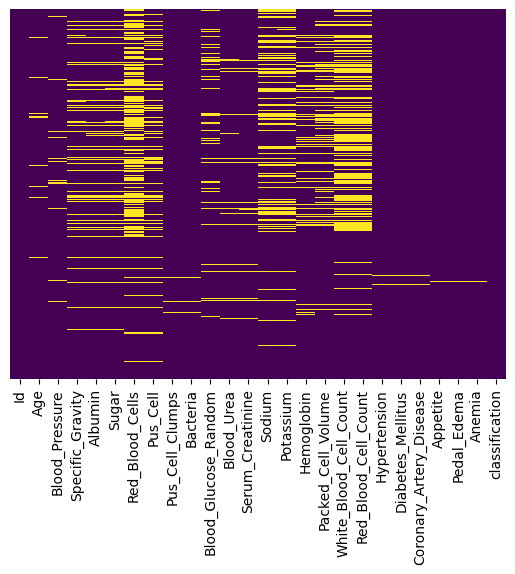

In [16]:
#BIỂU ĐỒ THỂ HIỆN GIÁ TRỊ CÒN THIẾU
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# XỬ LÝ GIÁ TRỊ THIẾU: 
1.BỎ GIÁ TRỊ NULL CÁC CỘT ÍT HƠN 5%
2.ĐIỀN GIÁ TRỊ TB VÀO CỘT
3.ĐIỀN VÀO CÁC CỘT

In [17]:
#B1
df.dropna(axis=0, subset=['Blood_Urea' , 'Serum_Creatinine','Blood_Pressure','Age','Bacteria','Pus_Cell_Clumps','Hypertension','Diabetes_Mellitus','Coronary_Artery_Disease','Anemia','Appetite','Pedal_Edema'],inplace=True)

In [18]:
#B2
for i in df.select_dtypes(include=['float64']) :
    df[i].fillna(df[i].mean(),inplace=True)

In [19]:
#B3
for i in df.select_dtypes(include=['object']) :
    df[i].fillna(df[i].mode()[0],inplace=True)
    

In [20]:
df.shape

(355, 26)

# KIỂM TRA CÁC TRƯỜNG HỢP NGOẠI LỆ KHÁC

In [21]:

from collections import Counter
def outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        Q1=np.percentile(df[c],25) 
        Q3=np.percentile(df[c],75) 
        IQR=Q3-Q1                  
        outlier_step=IQR*1.5     
        # Dòng tiếp theo sẽ phát hiện các ngoại lệ và phân số của chúng
        outlier_list_col=df[(df[c]<Q1-outlier_step) | (df[c]>Q3 + outlier_step)].index 
        outlier_indices.extend(outlier_list_col) 
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>2)
    
    return multiple_outliers

df.loc[outliers(df,df.select_dtypes(include=['float64']))]

Id   Age  Blood_Pressure  Specific_Gravity   Albumin     Sugar  \
18    18  60.0           100.0          1.025000  0.000000  3.000000   
90    90  63.0           100.0          1.010000  2.000000  2.000000   
93    93  73.0           100.0          1.010000  3.000000  2.000000   
98    98  50.0           140.0          1.017524  1.034921  0.467949   
99    99  56.0           180.0          1.017524  0.000000  4.000000   
107  107  55.0           100.0          1.015000  1.000000  4.000000   
133  133  70.0           100.0          1.015000  4.000000  0.000000   
175  175  60.0            50.0          1.010000  0.000000  0.000000   
196  196  49.0           100.0          1.010000  3.000000  0.000000   
198  198  59.0           100.0          1.020000  4.000000  2.000000   
210  210  59.0           100.0          1.015000  4.000000  2.000000   
226  226  64.0           100.0          1.015000  4.000000  2.000000   
229  229  59.0            50.0          1.010000  3.000000  0.000000   
238  238  72.0           100.0          1.017524  1.034921  0.467949   
245  245  48.0           100.0          1.017524  1.034921  0.467949   
246  246  48.0           110.0          1.015000  3.000000  0.000000   
3      3  48.0            70.0          1.005000  4.000000  0.000000   
76    76  48.0            80.0          1.005000  4.000000  0.000000   
154  154  56.0            90.0          1.005000  4.000000  3.000000   
14    14  68.0            80.0          1.010000  3.000000  2.000000   
56    56  76.0            70.0          1.015000  3.000000  4.000000   
61    61  67.0            80.0          1.010000  1.000000  3.000000   
128  128  52.0            90.0          1.015000  4.000000  3.000000   
143  143  41.0            80.0          1.015000  1.000000  4.000000   
172  172  62.0            80.0          1.010000  1.000000  2.000000   
184  184  54.0            60.0          1.015000  3.000000  2.000000   
204  204  65.0            90.0          1.010000  4.000000  2.000000   
212  212  40.0            70.0          1.015000  3.000000  4.000000   
242  242  69.0            70.0          1.010000  4.000000  3.000000   
147  147  60.0            60.0          1.010000  3.000000  1.000000   
153  153  55.0            90.0          1.010000  2.000000  1.000000   
15    15  40.0            80.0          1.015000  3.000000  0.000000   
20    20  61.0            80.0          1.015000  2.000000  0.000000   
21    21  60.0            90.0          1.017524  1.034921  0.467949   
43    43  35.0            80.0          1.010000  1.000000  0.000000   
84    84  59.0            70.0          1.010000  3.000000  0.000000   
130  130  50.0            90.0          1.010000  2.000000  0.000000   
145  145  57.0            90.0          1.015000  5.000000  0.000000   
193  193  32.0            90.0          1.025000  1.000000  0.000000   
249  249  56.0            90.0          1.010000  4.000000  1.000000   
197  197  57.0            80.0          1.017524  1.034921  0.467949   
171  171  83.0            70.0          1.020000  3.000000  0.000000   

    Red_Blood_Cells  Pus_Cell Pus_Cell_Clumps    Bacteria  ...  \
18           normal    normal      notpresent  notpresent  ...   
90           normal    normal      notpresent     present  ...   
93         abnormal  abnormal         present  notpresent  ...   
98           normal    normal      notpresent  notpresent  ...   
99           normal  abnormal      notpresent  notpresent  ...   
107          normal    normal      notpresent  notpresent  ...   
133          normal    normal      notpresent  notpresent  ...   
175          normal    normal      notpresent  notpresent  ...   
196        abnormal  abnormal      notpresent  notpresent  ...   
198          normal    normal      notpresent  notpresent  ...   
210          normal    normal      notpresent  notpresent  ...   
226        abnormal  abnormal      notpresent     present  ...   
229          normal  abnormal      notpresent  notp

In [22]:
#MÔ TẢ LẠI DỮ LIỆU
df.describe()

Id         Age  Blood_Pressure  Specific_Gravity     Albumin  \
count  355.000000  355.000000      355.000000        355.000000  355.000000   
mean   200.600000   52.490141       76.676056          1.017524    1.034921   
std    117.657686   16.228133       13.908270          0.005383    1.285090   
min      0.000000    5.000000       50.000000          1.005000    0.000000   
25%     97.500000   43.000000       70.000000          1.015000    0.000000   
50%    201.000000   55.000000       80.000000          1.017524    1.000000   
75%    304.500000   65.000000       80.000000          1.020000    2.000000   
max    399.000000   90.000000      180.000000          1.025000    5.000000   

            Sugar  Blood_Glucose_Random  Blood_Urea  Serum_Creatinine  \
count  355.000000            355.000000  355.000000        355.000000   
mean     0.467949            148.134146   57.887887          3.080704   
std      1.054556             75.554188   51.027094          5.855687   
min      0.000000             22.000000    1.500000          0.400000   
25%      0.000000            100.000000   27.000000          0.900000   
50%      0.000000            124.000000   42.000000          1.300000   
75%      0.467949            156.500000   66.000000          2.800000   
max      5.000000            490.000000  391.000000         76.000000   

           Sodium   Potassium  Hemoglobin  Packed_Cell_Volume  \
count  355.000000  355.000000  355.000000          355.000000   
mean   137.419861    4.652098   12.525240           38.841751   
std      9.691667    2.986842    2.744008            8.251958   
min      4.500000    2.500000    3.100000            9.000000   
25%    135.000000    3.900000   10.850000           33.500000   
50%    137.419861    4.652098   12.525240           38.841751   
75%    141.000000    4.800000   14.650000           44.000000   
max    163.000000   47.000000   17.800000           54.000000   

       White_Blood_Cell_Count  Red_Blood_Cell_Count  
count              355.000000            355.000000  
mean                 4.679268              4.679268  
std                  0.859583              0.859583  
min                  2.100000              2.100000  
25%                  4.400000              4.400000  
50%                  4.679268              4.679268  
75%                  5.100000              5.100000  
max                  8.000000              8.000000

# Visualization

In [23]:
# tìm kiếm mối quan hệ theo cặp trong dữ liệu
sns.pairplot(df.select_dtypes(include=['float64']),size=6,height=3)

c:\Users\nhutt\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


c:\Users\nhutt\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
c:\Users\nhutt\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
c:\Users\nhutt\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code.

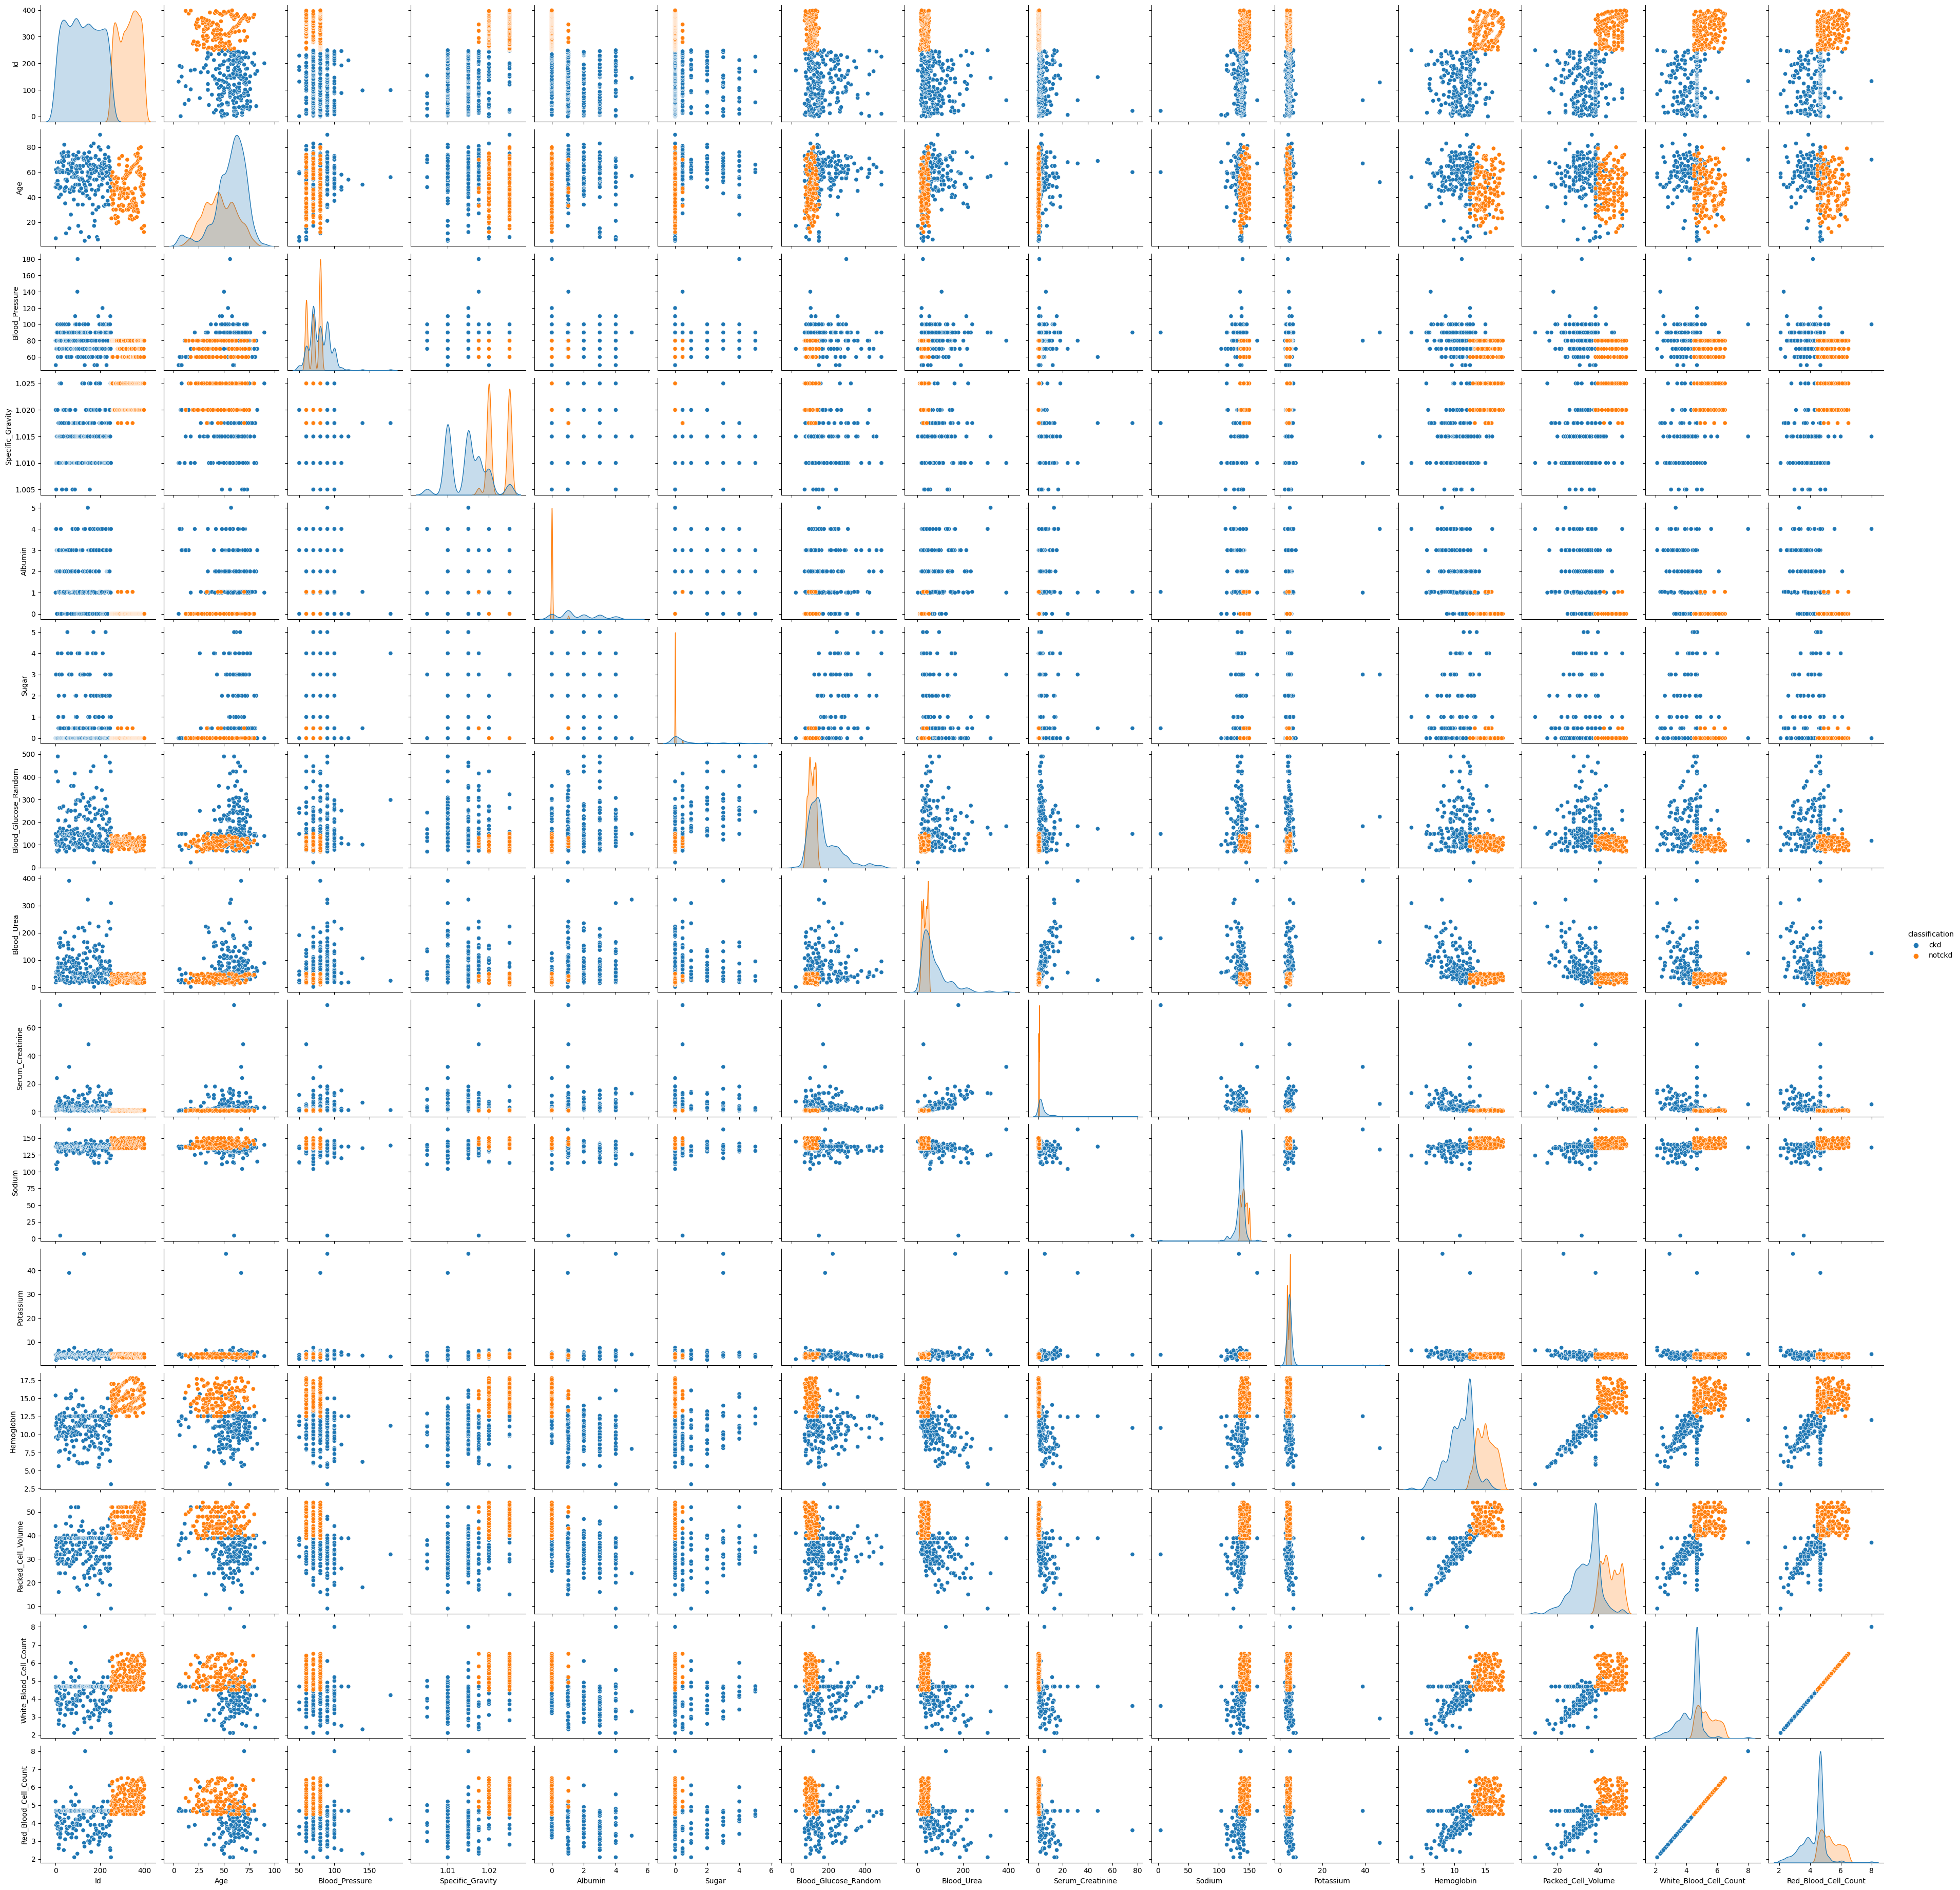

In [24]:
# tìm kiếm và sử dụng phân loại biến trong huename
# đến các khía cạnh màu sắc khác nhau:
sns.pairplot(df,hue='classification',diag_kws={'bw': 0.2})

In [25]:
# sắp xếp các giá trị theo độ tuổi:
df.sort_values(by=["Age"],inplace=True)

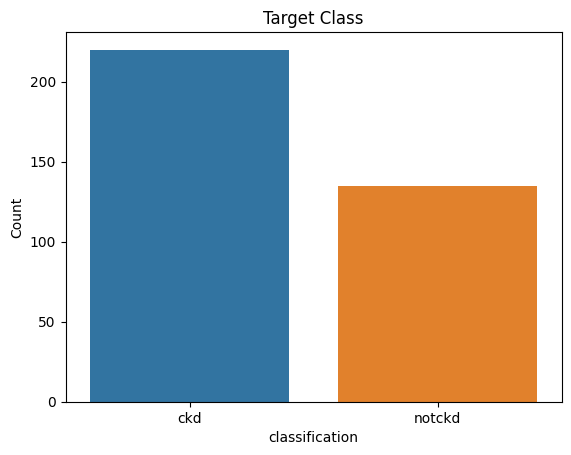

Phần trăm mẫu bệnh thận mãn tính:  61.97 %
Phần trăm không phải là mẫu bệnh thận mãn tính:  38.03 %


In [26]:
# % MẮC BỆNH THẬN VÀ KHÔNG MẮC BỆNH
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("Target Class")
plt.show()
print('Phần trăm mẫu bệnh thận mãn tính: ',round(len(df[df['classification']=='ckd'])/len(df['classification'])*100,2),"%")
print('Phần trăm không phải là mẫu bệnh thận mãn tính: ',round(len(df[df['classification']=='notckd'])/len(df['classification'])*100,2),"%")

C:\Users\nhutt\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":


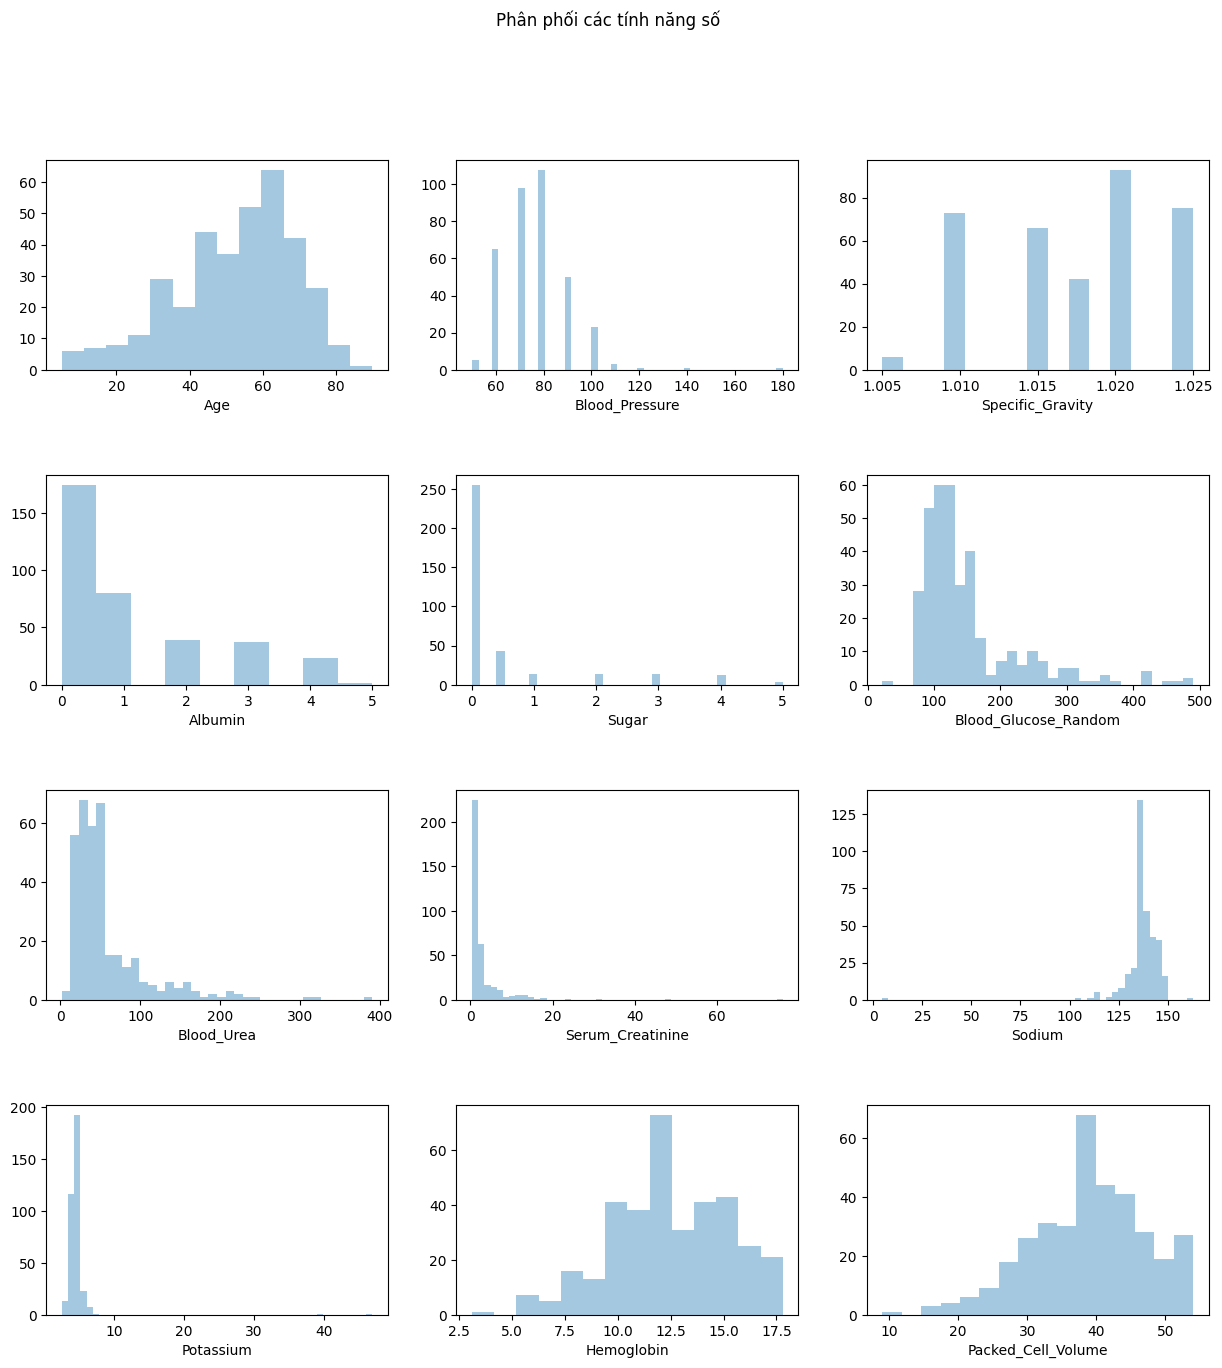

In [27]:
#BIỂU ĐỒ TÍNH NĂNG SỐ
# hiển thị các biểu đồ phân phối các tính năng số:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Phân phối các tính năng số')


for ax, feats in zip(axes.flatten(), df.select_dtypes(include=['float64'])):
    sns.distplot(a=df[feats], ax=ax , kde=False)

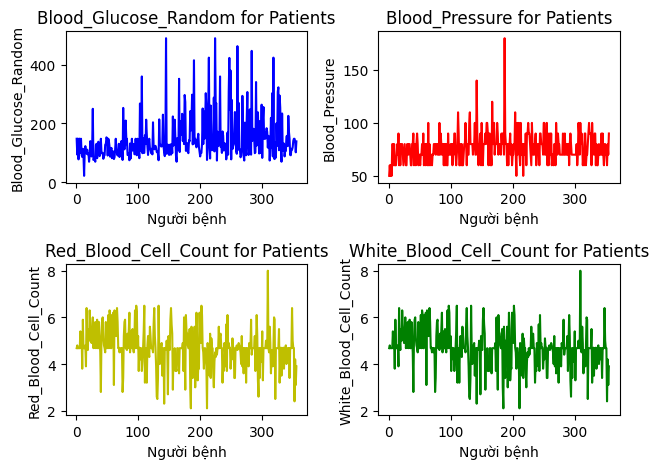

In [28]:
# hiển thị các biểu đồ về tỷ lệ các đặc điểm nổi giữa các bệnh nhân:
Patient_figure, Patient_axes = plt.subplots(nrows=2, ncols=2)
Patient = np.linspace(1, 355, 355)

axes1 = Patient_axes[0][0]
axes1.plot(Patient,df['Blood_Glucose_Random'],'b')
axes1.set_xlabel('Người bệnh')
axes1.set_ylabel('Blood_Glucose_Random')
axes1.set_title('Blood_Glucose_Random for Patients')

# Notice that Blood_Pressure has unique values [ 80.  50.  70.  90 , 100.  60. 110. 140. 180. 120.] 
axes2 = Patient_axes[0][1]
axes2.plot(Patient,df['Blood_Pressure'],'r')
axes2.set_xlabel('Người bệnh')
axes2.set_ylabel('Blood_Pressure')
axes2.set_title('Blood_Pressure for Patients')

axes3 = Patient_axes[1][0]
axes3.plot(Patient,df['Red_Blood_Cell_Count'],'y')
axes3.set_xlabel('Người bệnh')
axes3.set_ylabel('Red_Blood_Cell_Count')
axes3.set_title('Red_Blood_Cell_Count for Patients')


axes4 = Patient_axes[1][1]
axes4.plot(Patient,df['White_Blood_Cell_Count'],'g')
axes4.set_xlabel('Người bệnh')
axes4.set_ylabel('White_Blood_Cell_Count')
axes4.set_title('White_Blood_Cell_Count for Patients')

Patient_figure.tight_layout()

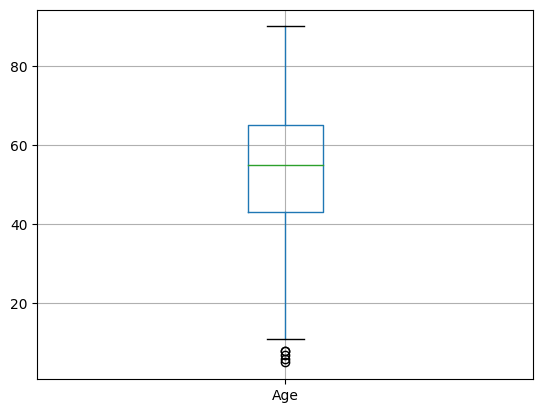

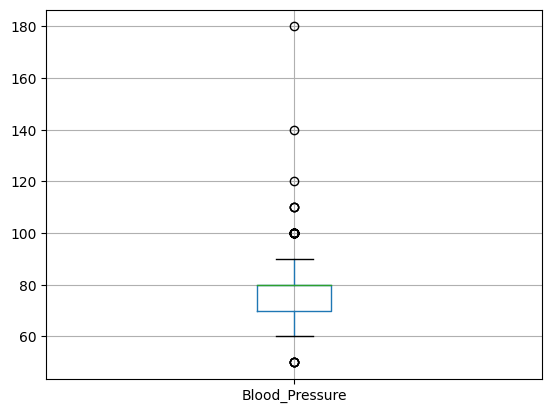

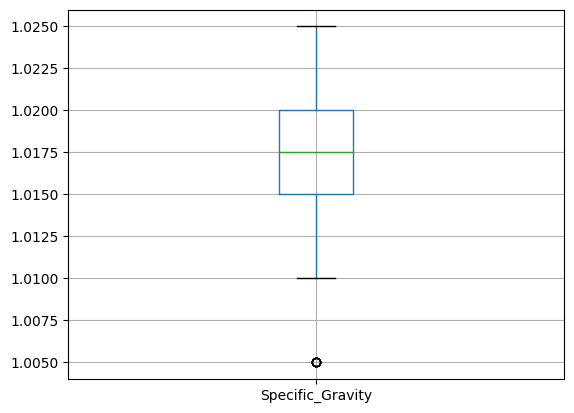

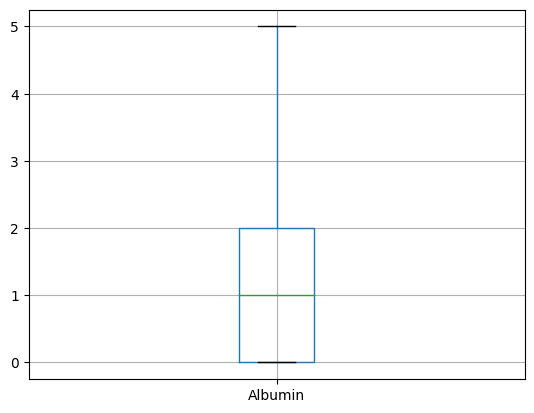

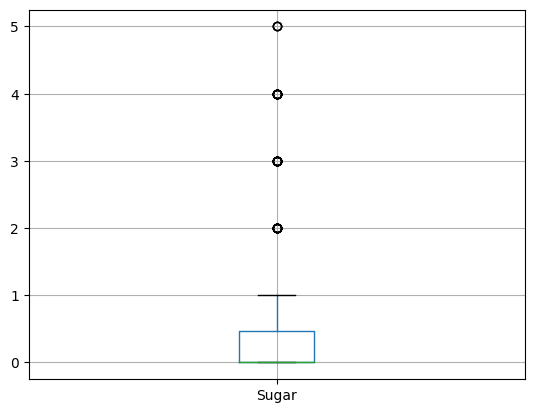

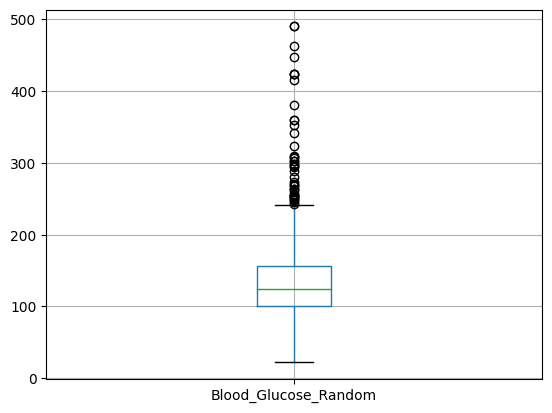

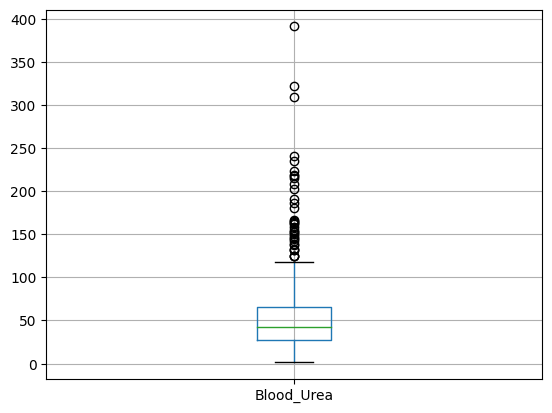

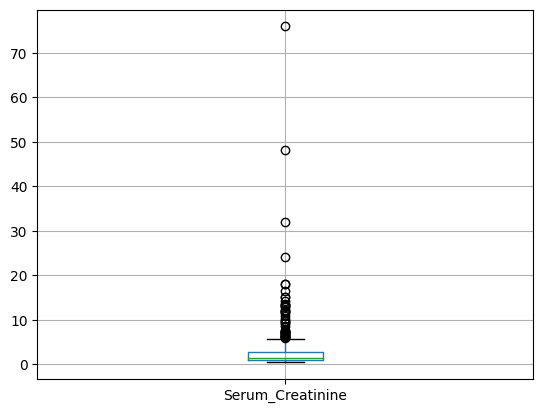

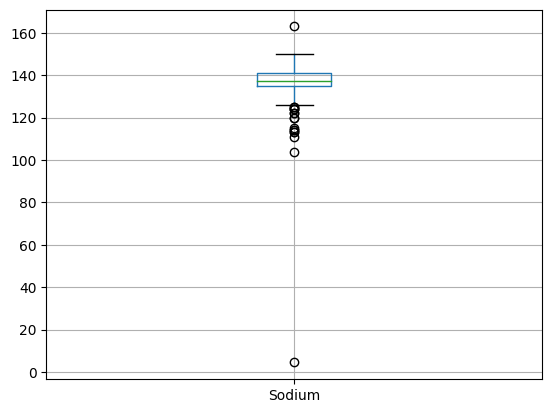

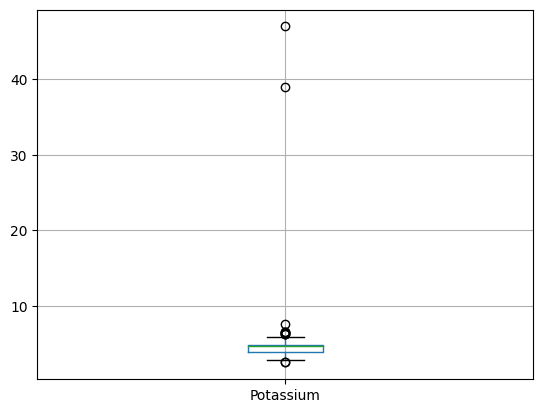

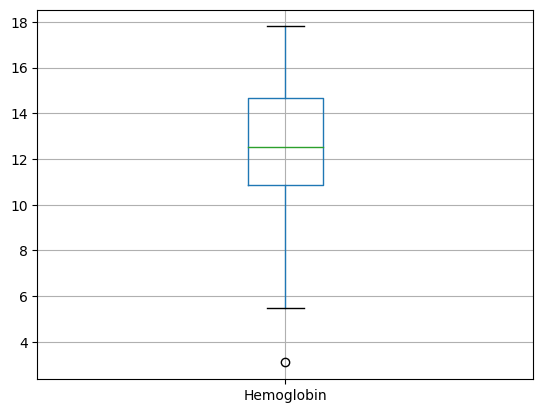

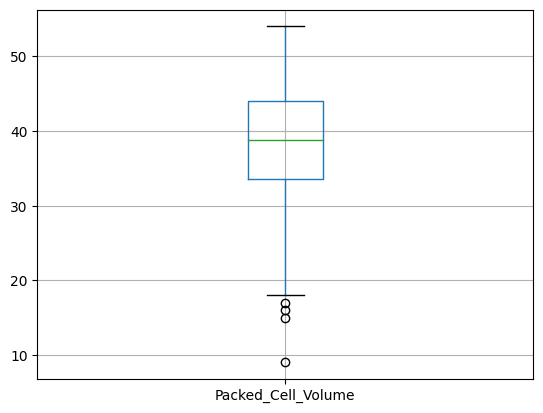

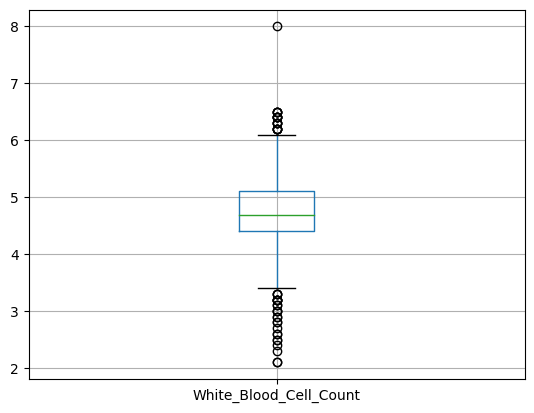

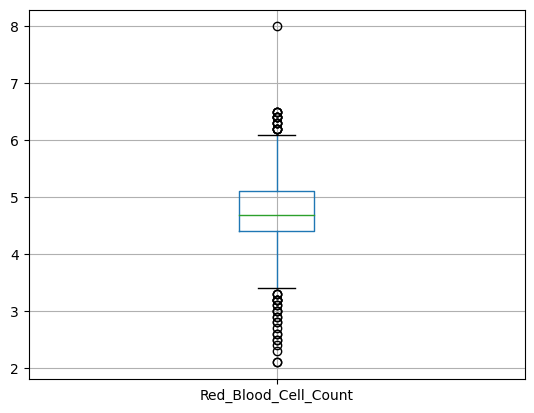

In [29]:
# trực quan hóa các tính năng số trong tập dữ liệu:
for column in df.select_dtypes(include=['float64']):
    plt.figure()
    df.boxplot([column])

# TÌM MỐI QUAN HỆ GIỮA HAI TÍNH NĂNG 

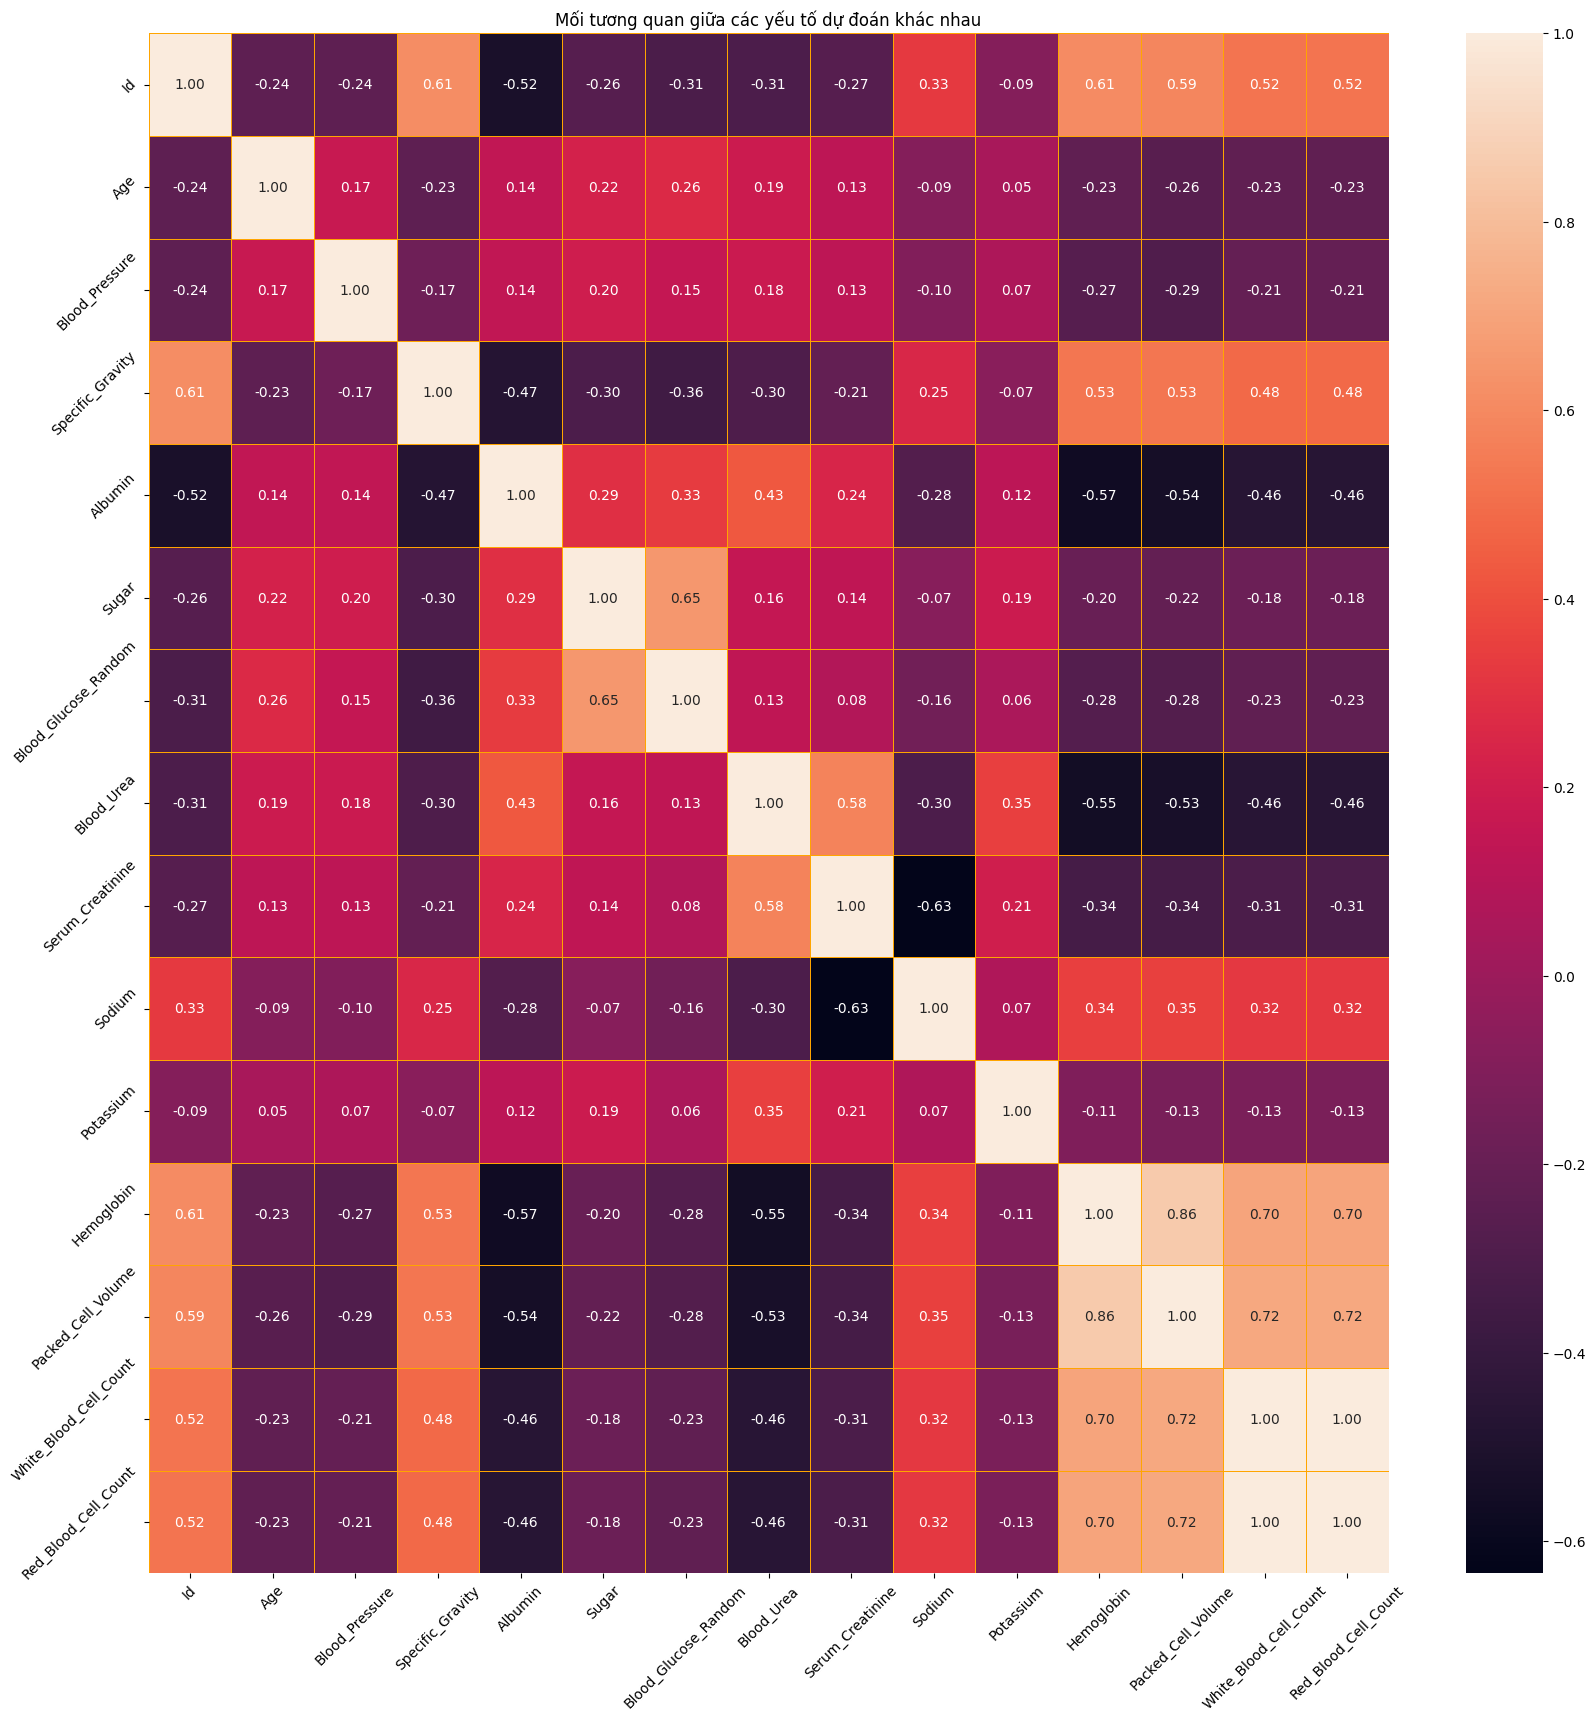

In [30]:
#Mã này sẽ hiển thị mối tương quan giữa hai tính năng:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Mối tương quan giữa các yếu tố dự đoán khác nhau')
plt.show()

In [31]:
import plotly.express as px
import plotly.io as pio

# Create the scatter plot figure
fig = px.scatter(df, x="Packed_Cell_Volume", y="Specific_Gravity", color="classification")

# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')

# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')


True

In [32]:
# hiển thị các biểu đồ cho mối tương quan thuận (Red_Blood_Cell_Count VS Hemoglobin):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="Red_Blood_Cell_Count", y="Hemoglobin", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [33]:
# hiển thị các biểu đồ cho mối tương quan thuận (Packed_Cell_Volume VS White_Blood_Cell_Count):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="Packed_Cell_Volume", y="White_Blood_Cell_Count", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [34]:
# Mã này sẽ hiển thị các biểu đồ cho mối tương quan thuận (Packed_Cell_Volume VS White_Blood_Cell_Count):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="Packed_Cell_Volume", y="Red_Blood_Cell_Count", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [35]:
# hiển thị các biểu đồ cho mối tương quan thuận (Red_Blood_Cell_Count VS Specific_Gravity):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="Red_Blood_Cell_Count", y="Specific_Gravity", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [36]:
# hiển thị các biểu đồ cho mối tương quan thuận (Red_Blood_Cell_Count VS Hemoglobin):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="Red_Blood_Cell_Count", y="Hemoglobin", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [37]:
# hiển thị các biểu đồ cho mối tương quan thuận (Red_Blood_Cell_Count VS Hemoglobin):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="Red_Blood_Cell_Count", y="Hemoglobin", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [38]:
# hiển thị các biểu đồ cho mối tương quan thuận (Red_Blood_Cell_Count VS White_Blood_Cell_Count):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="Red_Blood_Cell_Count", y="White_Blood_Cell_Count", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [39]:
# hiển thị các biểu đồ cho mối tương quan thuận (White_Blood_Cell_Count VS Specific_Gravity):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="White_Blood_Cell_Count", y="Specific_Gravity", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')



True

In [40]:
# hiển thị các biểu đồ cho mối tương quan thuận (White_Blood_Cell_Count VS Hemoglobin):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="White_Blood_Cell_Count", y="Hemoglobin", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [41]:
# hiển thị các biểu đồ cho mối tương quan thuận (Hemoglobin VS Specific_Gravity):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="Hemoglobin", y="Specific_Gravity", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [42]:
# hiển thị các biểu đồ cho mối tương quan tích cực (Blood_Glucose_Random VS Sugar):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="Blood_Glucose_Random", y="Sugar", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [43]:
# hiển thị các biểu đồ cho mối tương quan nghịch (Packed_Cell_Volume VS Albumin):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="Packed_Cell_Volume", y="Albumin", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [44]:
# hiển thị các biểu đồ cho mối tương quan nghịch (Packed_Cell_Volume VS Blood_Urea):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="Packed_Cell_Volume", y="Blood_Urea", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [45]:
# hiển thị các biểu đồ cho mối tương quan nghịch (Red_Blood_Cell_Count VS Albumin):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="Red_Blood_Cell_Count", y="Albumin", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [46]:
# hiển thị các biểu đồ cho mối tương quan nghịch (Red_Blood_Cell_Count VS Blood_Urea):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x="Red_Blood_Cell_Count", y="Blood_Urea", color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [47]:
# hiển thị các biểu đồ cho mối tương quan nghịch (White_Blood_Cell_Count VS Blood_Urea):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x='White_Blood_Cell_Count', y='Blood_Urea', color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [48]:
# hiển thị các biểu đồ cho mối tương quan nghịch (White_Blood_Cell_Count VS Albumin):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x='White_Blood_Cell_Count', y='Albumin', color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [49]:
# hiển thị các biểu đồ cho mối tương quan nghịch (Hemoglobin VS Blood_Urea):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x='Hemoglobin', y='Blood_Urea', color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [50]:
#hiển thị các biểu đồ cho mối tương quan nghịch (Hemoglobin VS Albumin):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x='Hemoglobin', y='Albumin', color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

In [51]:
# hiển thị các biểu đồ cho mối tương quan nghịch (Sodium VS Serum_Creatinine):
import plotly.express as px
import plotly.io as pio
fig = px.scatter(df, x='Sodium', y='Serum_Creatinine', color="classification")
# Save the figure as an HTML file
pio.write_html(fig, 'scatter_plot.html')
# Open the HTML file in a web browser
import webbrowser
webbrowser.open('scatter_plot.html')

True

# VISUALATION PHÂN TÍCH

C:\Users\nhutt\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\nhutt\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\nhutt\AppData\Roaming\Python\Python37\site-packag

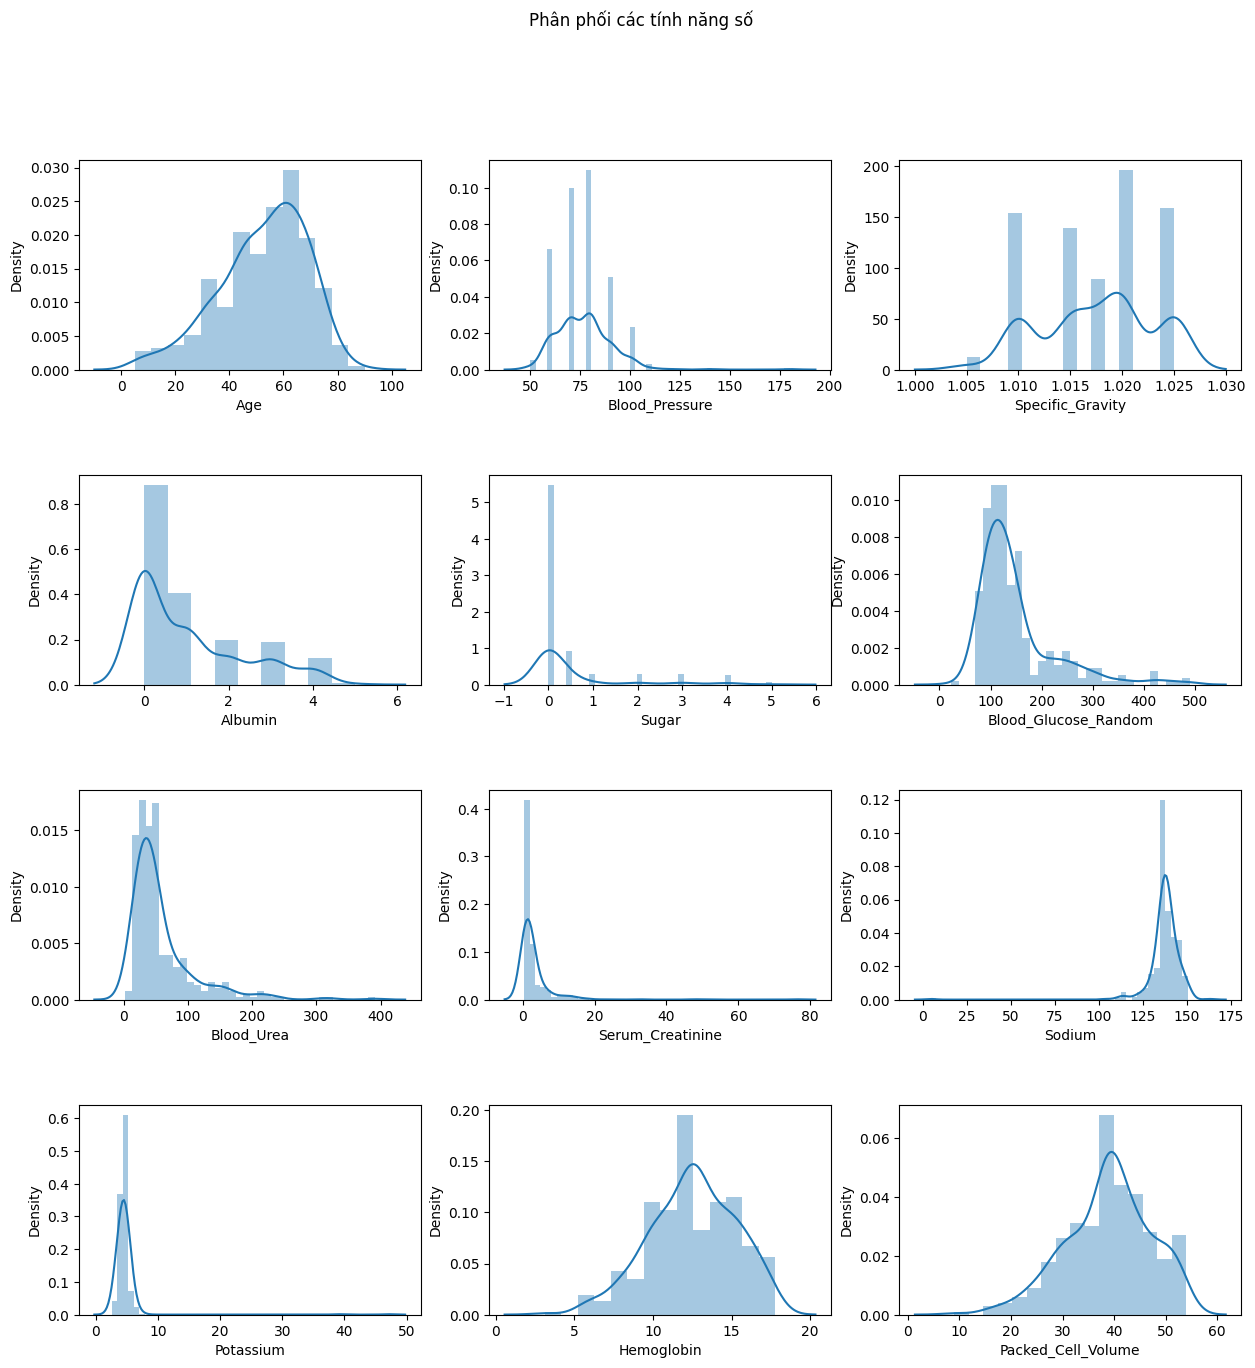

In [52]:
# hiển thị các biểu đồ phân phối bình thường của các Tính năng số:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Phân phối các tính năng số')


for ax, feats in zip(axes.flatten(), df.select_dtypes(include=['float64'])):
    sns.distplot(a=df[feats], ax=ax)

c:\Users\nhutt\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\nhutt\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




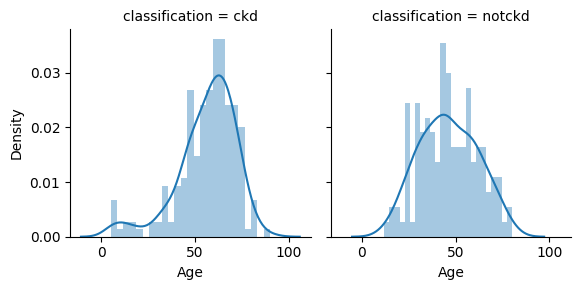

In [53]:
# hiển thị phân phối bình thường của Tuổi đối với CKD và NOTCKD
g = sns.FacetGrid(df,col="classification")
g.map(sns.distplot,"Age", bins=25)
plt.show()

In [54]:
# hiển thị phương sai cho các tính năng số:
np.var(df)

c:\Users\nhutt\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3721: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Id                        13804.335775
Age                         262.610466
Blood_Pressure              192.895061
Specific_Gravity              0.000029
Albumin                       1.646805
Sugar                         1.108956
Blood_Glucose_Random       5692.355204
Blood_Urea                 2596.429741
Serum_Creatinine             34.192480
Sodium                       93.663822
Potassium                     8.896095
Hemoglobin                    7.508368
Packed_Cell_Volume           67.902992
White_Blood_Cell_Count        0.736801
Red_Blood_Cell_Count          0.736801
dtype: float64

# ĐỘ LỆCH CHUẨN : MỘT ĐẠI LƯỢNG THỐNG KÊ MÔ TẢ DÙNG ĐỂ ĐO LƯỜNG MỨC ĐỘ PHÂN TÁN TẬP DL THÀNH BẢNG TẦN SỐ

In [55]:
# hiển thị độ lệch chuẩn cho các tính năng số:
np.std(df)

c:\Users\nhutt\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Id                        117.491854
Age                        16.205260
Blood_Pressure             13.888667
Specific_Gravity            0.005375
Albumin                     1.283279
Sugar                       1.053070
Blood_Glucose_Random       75.447698
Blood_Urea                 50.955174
Serum_Creatinine            5.847434
Sodium                      9.678007
Potassium                   2.982632
Hemoglobin                  2.740140
Packed_Cell_Volume          8.240327
White_Blood_Cell_Count      0.858371
Red_Blood_Cell_Count        0.858371
dtype: float64

In [56]:
#Loại bỏ dữ liệu trùng lập(*)
print(f"Koại bỏ':{df.shape}")
df.drop_duplicates(inplace=True)



Koại bỏ':(355, 26)


In [57]:
# hiển thị lỗi tiêu chuẩn của giá trị trung bình cho các tính năng số:
stats.sem(df.select_dtypes(include=['float64']))

array([8.61299875e-01, 7.38174302e-01, 2.85676612e-04, 6.82055152e-02,
       5.59700359e-02, 4.00999993e+00, 2.70823693e+00, 3.10787590e-01,
       5.14380275e-01, 1.58525115e-01, 1.45636805e-01, 4.37968449e-01,
       4.56219034e-02, 4.56219034e-02])

In [58]:
# hiển thị chế độ:
stats.mode(df)

ModeResult(mode=array([[0, 60.0, 80.0, 1.02, 0.0, 0.0, 'normal', 'normal', 'notpresent',
        'notpresent', 148.1341463414634, 46.0, 1.2, 137.4198606271777,
        4.6520979020979025, 12.525239616613417, 38.841750841750844,
        4.679268292682926, 4.679268292682926, 'no', 'no', 'no', 'good',
        'no', 'no', 'ckd']], dtype=object), count=array([[  1,  17, 108,  93, 175, 256, 314, 285, 313, 333,  27,  14,  37,
         68,  69,  42,  58, 109, 109, 216, 322, 322, 278, 287, 302, 220]]))

In [59]:
# hiển thị giá trị trung bình hài hòa:
stats.hmean(df.select_dtypes(include=['float64']))

array([ 42.96719715,  74.46729617,   1.01749554,   0.        ,
         0.        , 124.14892381,  34.40774448,   1.2734962 ,
       126.89427375,   4.34731545,  11.78391576,  36.59108758,
         4.49776996,   4.49776996])

In [60]:
# hiển thị điểm Z-score:
stats.zscore(df.select_dtypes(include=['float64']))

Age  Blood_Pressure  Specific_Gravity   Albumin         Sugar  \
131 -2.930539       -1.920707     -1.399814e+00 -0.806466 -4.443662e-01   
190 -2.868830       -1.200695     -1.399814e+00  2.310549 -4.443662e-01   
1   -2.807122       -1.920707      4.606606e-01  2.310549 -4.443662e-01   
150 -2.745414       -1.200695      1.390898e+00  1.531295 -4.443662e-01   
186 -2.745414       -1.920707      4.606606e-01  2.310549 -4.443662e-01   
..        ...             ...               ...       ...           ...   
194  1.697588       -0.480684     -1.399814e+00  0.752042  5.271364e-17   
160  1.759297       -1.200695     -4.131083e-14  0.000000  5.271364e-17   
39   1.821005        0.239328     -1.399814e+00  0.752042  1.454843e+00   
171  1.882713       -0.480684      4.606606e-01  1.531295 -4.443662e-01   
200  2.314672        0.959339      1.390898e+00 -0.027212 -4.443662e-01   

     Blood_Glucose_Random  Blood_Urea  Serum_Creatinine    Sodium  \
131              0.000000   -0.645428         -0.424238  0.000000   
190             -0.717506    0.178826         -0.355832 -0.250037   
1                0.000000   -0.782803         -0.390035  0.000000   
150             -0.929573   -0.606178         -0.372934  0.000000   
186              0.000000   -0.233301         -0.355832 -0.250037   
..                    ...         ...               ...       ...   
194              0.000000   -0.174426         -0.321629  0.000000   
160             -0.001778   -0.370677         -0.167715  0.989888   
39              -0.107812    0.237701          0.054604 -0.146710   
171             -0.611472    0.041450         -0.082208 -2.316578   
200             -0.121066    0.610578         -0.013802  0.266598   

        Potassium    Hemoglobin  Packed_Cell_Volume  White_Blood_Cell_Count  \
131  2.977834e-16 -2.646725e-01           -0.344859                0.000000   
190  8.311521e-02 -9.580677e-01           -1.072985                0.140652   
1    2.977834e-16 -4.471449e-01           -0.102150                0.000000   
150  2.977834e-16 -8.220004e-02            0.261913                0.000000   
186 -2.856865e-01 -6.482723e-16            0.000000                0.000000   
..            ...           ...                 ...                     ...   
194  2.977834e-16 -6.482723e-16            0.000000                0.000000   
160 -1.515768e-01 -5.931228e-01           -0.466213               -2.655342   
39  -1.515768e-01  1.732614e-01            0.140559               -0.558346   
171  3.513347e-01 -1.396001e+00           -1.558403               -1.839844   
200 -1.851042e-01 -1.916835e-01           -0.223505               -0.907846   

     Red_Blood_Cell_Count  
131              0.000000  
190              0.140652  
1                0.000000  
150              0.000000  
186              0.000000  
..                    ...  
194              0.000000  
160             -2.655342  
39              -0.558346  
171             -1.839844  
200             -0.907846  

[355 rows x 14 columns]

# BIỂU ĐỒ XÁC XUẤT CHO CÁC TÍNH NĂNG SỐ :

(array([-2.88603847, -2.59463516, -2.43004007, -2.31295397, -2.22096715,
        -2.14464549, -2.07908848, -2.02141102, -1.96976551, -1.92289476,
        -1.87990311, -1.840129  , -1.8030694 , -1.76833251, -1.73560699,
        -1.70464119, -1.67522863, -1.64719779, -1.6204045 , -1.59472641,
        -1.57005874, -1.54631106, -1.52340473, -1.50127095, -1.47984914,
        -1.45908568, -1.43893287, -1.41934808, -1.40029307, -1.38173334,
        -1.36363774, -1.34597796, -1.32872825, -1.31186509, -1.29536695,
        -1.27921405, -1.26338819, -1.24787258, -1.2326517 , -1.21771116,
        -1.2030376 , -1.18861859, -1.17444257, -1.16049871, -1.1467769 ,
        -1.1332677 , -1.1199622 , -1.10685208, -1.09392949, -1.08118705,
        -1.06861778, -1.05621511, -1.04397282, -1.03188502, -1.01994615,
        -1.00815092, -0.99649431, -0.98497155, -0.9735781 , -0.96230965,
        -0.9511621 , -0.9401315 , -0.92921412, -0.91840639, -0.90770489,
        -0.89710634, -0.88660761, -0.87620571, -0.8

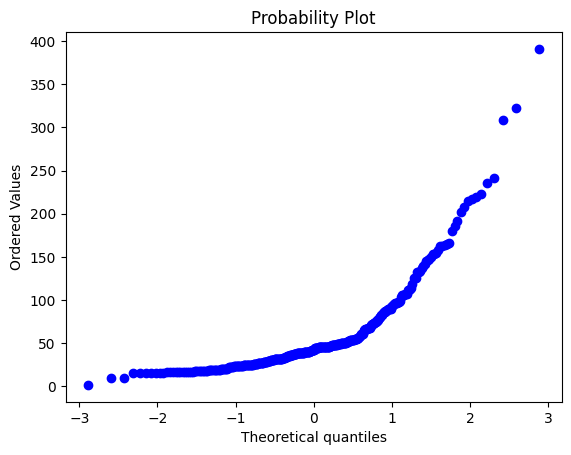

In [61]:
stats.probplot(df['Blood_Urea'], plot=plt , fit=False)


(array([0.00097579, 0.00237009, 0.00378144, 0.00519479, 0.00661014,
        0.00802752, 0.00944693, 0.01086837, 0.01229186, 0.0137174 ,
        0.01514501, 0.01657469, 0.01800645, 0.0194403 , 0.02087625,
        0.02231431, 0.02375448, 0.02519679, 0.02664123, 0.02808782,
        0.02953657, 0.03098748, 0.03244056, 0.03389584, 0.03535331,
        0.03681298, 0.03827487, 0.03973898, 0.04120533, 0.04267393,
        0.04414478, 0.0456179 , 0.0470933 , 0.04857098, 0.05005097,
        0.05153326, 0.05301787, 0.05450482, 0.0559941 , 0.05748574,
        0.05897975, 0.06047613, 0.06197489, 0.06347606, 0.06497964,
        0.06648563, 0.06799406, 0.06950494, 0.07101827, 0.07253408,
        0.07405236, 0.07557314, 0.07709642, 0.07862222, 0.08015056,
        0.08168143, 0.08321486, 0.08475087, 0.08628945, 0.08783063,
        0.08937442, 0.09092083, 0.09246987, 0.09402156, 0.09557592,
        0.09713295, 0.09869267, 0.10025509, 0.10182024, 0.10338811,
        0.10495873, 0.10653211, 0.10810827, 0.10

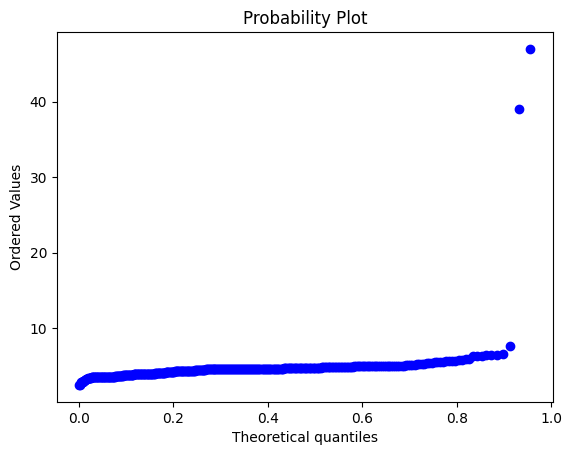

In [62]:
stats.probplot(df['Potassium'], dist=stats.beta, sparams=(1,2), plot=plt, fit=False)

(array([0.00097579, 0.00237009, 0.00378144, 0.00519479, 0.00661014,
        0.00802752, 0.00944693, 0.01086837, 0.01229186, 0.0137174 ,
        0.01514501, 0.01657469, 0.01800645, 0.0194403 , 0.02087625,
        0.02231431, 0.02375448, 0.02519679, 0.02664123, 0.02808782,
        0.02953657, 0.03098748, 0.03244056, 0.03389584, 0.03535331,
        0.03681298, 0.03827487, 0.03973898, 0.04120533, 0.04267393,
        0.04414478, 0.0456179 , 0.0470933 , 0.04857098, 0.05005097,
        0.05153326, 0.05301787, 0.05450482, 0.0559941 , 0.05748574,
        0.05897975, 0.06047613, 0.06197489, 0.06347606, 0.06497964,
        0.06648563, 0.06799406, 0.06950494, 0.07101827, 0.07253408,
        0.07405236, 0.07557314, 0.07709642, 0.07862222, 0.08015056,
        0.08168143, 0.08321486, 0.08475087, 0.08628945, 0.08783063,
        0.08937442, 0.09092083, 0.09246987, 0.09402156, 0.09557592,
        0.09713295, 0.09869267, 0.10025509, 0.10182024, 0.10338811,
        0.10495873, 0.10653211, 0.10810827, 0.10

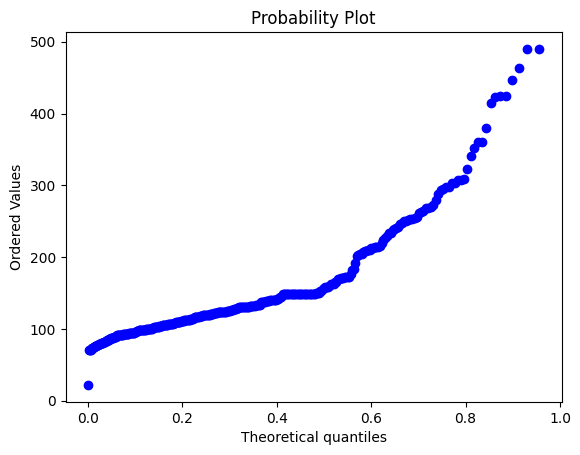

In [63]:
stats.probplot(df['Blood_Glucose_Random'], dist=stats.beta, sparams=(1,2), plot=plt, fit=False)

(array([0.00097579, 0.00237009, 0.00378144, 0.00519479, 0.00661014,
        0.00802752, 0.00944693, 0.01086837, 0.01229186, 0.0137174 ,
        0.01514501, 0.01657469, 0.01800645, 0.0194403 , 0.02087625,
        0.02231431, 0.02375448, 0.02519679, 0.02664123, 0.02808782,
        0.02953657, 0.03098748, 0.03244056, 0.03389584, 0.03535331,
        0.03681298, 0.03827487, 0.03973898, 0.04120533, 0.04267393,
        0.04414478, 0.0456179 , 0.0470933 , 0.04857098, 0.05005097,
        0.05153326, 0.05301787, 0.05450482, 0.0559941 , 0.05748574,
        0.05897975, 0.06047613, 0.06197489, 0.06347606, 0.06497964,
        0.06648563, 0.06799406, 0.06950494, 0.07101827, 0.07253408,
        0.07405236, 0.07557314, 0.07709642, 0.07862222, 0.08015056,
        0.08168143, 0.08321486, 0.08475087, 0.08628945, 0.08783063,
        0.08937442, 0.09092083, 0.09246987, 0.09402156, 0.09557592,
        0.09713295, 0.09869267, 0.10025509, 0.10182024, 0.10338811,
        0.10495873, 0.10653211, 0.10810827, 0.10

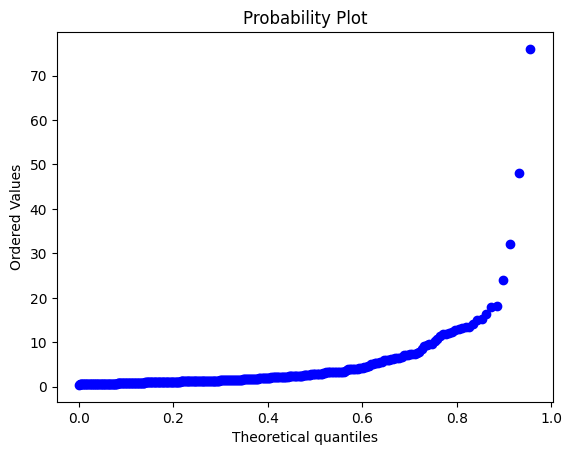

In [64]:
stats.probplot(df['Serum_Creatinine'], dist=stats.beta, sparams=(1,2), plot=plt, fit=False)

(array([0.00097579, 0.00237009, 0.00378144, 0.00519479, 0.00661014,
        0.00802752, 0.00944693, 0.01086837, 0.01229186, 0.0137174 ,
        0.01514501, 0.01657469, 0.01800645, 0.0194403 , 0.02087625,
        0.02231431, 0.02375448, 0.02519679, 0.02664123, 0.02808782,
        0.02953657, 0.03098748, 0.03244056, 0.03389584, 0.03535331,
        0.03681298, 0.03827487, 0.03973898, 0.04120533, 0.04267393,
        0.04414478, 0.0456179 , 0.0470933 , 0.04857098, 0.05005097,
        0.05153326, 0.05301787, 0.05450482, 0.0559941 , 0.05748574,
        0.05897975, 0.06047613, 0.06197489, 0.06347606, 0.06497964,
        0.06648563, 0.06799406, 0.06950494, 0.07101827, 0.07253408,
        0.07405236, 0.07557314, 0.07709642, 0.07862222, 0.08015056,
        0.08168143, 0.08321486, 0.08475087, 0.08628945, 0.08783063,
        0.08937442, 0.09092083, 0.09246987, 0.09402156, 0.09557592,
        0.09713295, 0.09869267, 0.10025509, 0.10182024, 0.10338811,
        0.10495873, 0.10653211, 0.10810827, 0.10

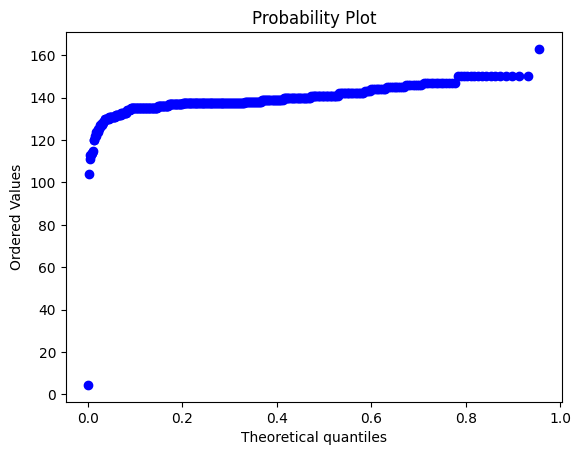

In [65]:
stats.probplot(df['Sodium'], dist=stats.beta, sparams=(1,2), plot=plt, fit=False)

(array([0.00097579, 0.00237009, 0.00378144, 0.00519479, 0.00661014,
        0.00802752, 0.00944693, 0.01086837, 0.01229186, 0.0137174 ,
        0.01514501, 0.01657469, 0.01800645, 0.0194403 , 0.02087625,
        0.02231431, 0.02375448, 0.02519679, 0.02664123, 0.02808782,
        0.02953657, 0.03098748, 0.03244056, 0.03389584, 0.03535331,
        0.03681298, 0.03827487, 0.03973898, 0.04120533, 0.04267393,
        0.04414478, 0.0456179 , 0.0470933 , 0.04857098, 0.05005097,
        0.05153326, 0.05301787, 0.05450482, 0.0559941 , 0.05748574,
        0.05897975, 0.06047613, 0.06197489, 0.06347606, 0.06497964,
        0.06648563, 0.06799406, 0.06950494, 0.07101827, 0.07253408,
        0.07405236, 0.07557314, 0.07709642, 0.07862222, 0.08015056,
        0.08168143, 0.08321486, 0.08475087, 0.08628945, 0.08783063,
        0.08937442, 0.09092083, 0.09246987, 0.09402156, 0.09557592,
        0.09713295, 0.09869267, 0.10025509, 0.10182024, 0.10338811,
        0.10495873, 0.10653211, 0.10810827, 0.10

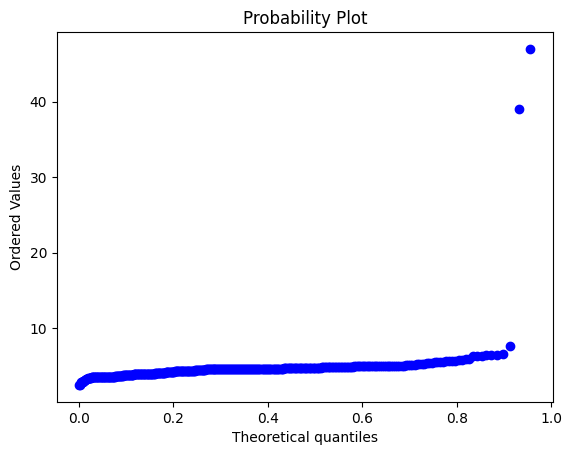

In [66]:
stats.probplot(df['Potassium'], dist=stats.beta, sparams=(1,2), plot=plt, fit=False)

(array([0.00097579, 0.00237009, 0.00378144, 0.00519479, 0.00661014,
        0.00802752, 0.00944693, 0.01086837, 0.01229186, 0.0137174 ,
        0.01514501, 0.01657469, 0.01800645, 0.0194403 , 0.02087625,
        0.02231431, 0.02375448, 0.02519679, 0.02664123, 0.02808782,
        0.02953657, 0.03098748, 0.03244056, 0.03389584, 0.03535331,
        0.03681298, 0.03827487, 0.03973898, 0.04120533, 0.04267393,
        0.04414478, 0.0456179 , 0.0470933 , 0.04857098, 0.05005097,
        0.05153326, 0.05301787, 0.05450482, 0.0559941 , 0.05748574,
        0.05897975, 0.06047613, 0.06197489, 0.06347606, 0.06497964,
        0.06648563, 0.06799406, 0.06950494, 0.07101827, 0.07253408,
        0.07405236, 0.07557314, 0.07709642, 0.07862222, 0.08015056,
        0.08168143, 0.08321486, 0.08475087, 0.08628945, 0.08783063,
        0.08937442, 0.09092083, 0.09246987, 0.09402156, 0.09557592,
        0.09713295, 0.09869267, 0.10025509, 0.10182024, 0.10338811,
        0.10495873, 0.10653211, 0.10810827, 0.10

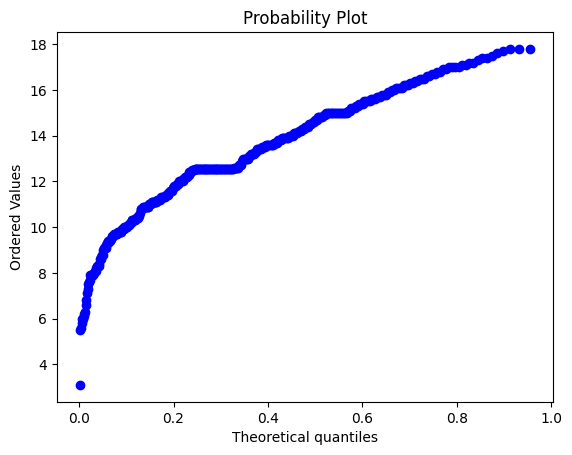

In [67]:
stats.probplot(df['Hemoglobin'], dist=stats.beta, sparams=(1,2), plot=plt, fit=False)

(array([0.00097579, 0.00237009, 0.00378144, 0.00519479, 0.00661014,
        0.00802752, 0.00944693, 0.01086837, 0.01229186, 0.0137174 ,
        0.01514501, 0.01657469, 0.01800645, 0.0194403 , 0.02087625,
        0.02231431, 0.02375448, 0.02519679, 0.02664123, 0.02808782,
        0.02953657, 0.03098748, 0.03244056, 0.03389584, 0.03535331,
        0.03681298, 0.03827487, 0.03973898, 0.04120533, 0.04267393,
        0.04414478, 0.0456179 , 0.0470933 , 0.04857098, 0.05005097,
        0.05153326, 0.05301787, 0.05450482, 0.0559941 , 0.05748574,
        0.05897975, 0.06047613, 0.06197489, 0.06347606, 0.06497964,
        0.06648563, 0.06799406, 0.06950494, 0.07101827, 0.07253408,
        0.07405236, 0.07557314, 0.07709642, 0.07862222, 0.08015056,
        0.08168143, 0.08321486, 0.08475087, 0.08628945, 0.08783063,
        0.08937442, 0.09092083, 0.09246987, 0.09402156, 0.09557592,
        0.09713295, 0.09869267, 0.10025509, 0.10182024, 0.10338811,
        0.10495873, 0.10653211, 0.10810827, 0.10

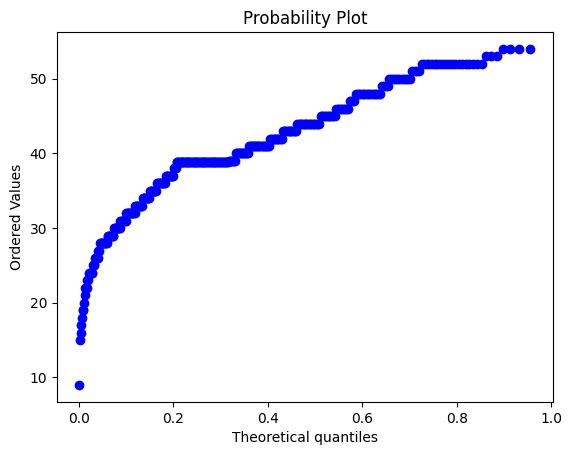

In [68]:
stats.probplot(df['Packed_Cell_Volume'], dist=stats.beta, sparams=(1,2), plot=plt, fit=False)

In [69]:
# hiển thị các giá trị duy nhất của các tính năng đối tượng:
for i in df.select_dtypes(include=['object']).columns:
    print('{} có giá trị duy nhất {}'.format(i,df[i].unique()),'\n')

Red_Blood_Cells có giá trị duy nhất ['normal' 'abnormal'] 

Pus_Cell có giá trị duy nhất ['normal' 'abnormal'] 

Pus_Cell_Clumps có giá trị duy nhất ['notpresent' 'present'] 

Bacteria có giá trị duy nhất ['notpresent' 'present'] 

Hypertension có giá trị duy nhất ['no' 'yes'] 

Diabetes_Mellitus có giá trị duy nhất ['no' 'yes'] 

Coronary_Artery_Disease có giá trị duy nhất ['no' 'yes'] 

Appetite có giá trị duy nhất ['good' 'poor'] 

Pedal_Edema có giá trị duy nhất ['no' 'yes'] 

Anemia có giá trị duy nhất ['no' 'yes'] 

classification có giá trị duy nhất ['ckd' 'notckd'] 



In [70]:
# chuyển đổi dữ liệu danh mục thành số có thể áp dụng thuật toán ML:
df.Red_Blood_Cells=df.Red_Blood_Cells.map({ 'normal' : 1, 'abnormal' : 0})
df.Pus_Cell=df.Pus_Cell.map({ 'normal' : 1, 'abnormal' : 0})
df.Pus_Cell_Clumps=df.Pus_Cell_Clumps.map({ 'present' : 1, 'notpresent' : 0})
df.Bacteria=df.Bacteria.map({ 'present' : 1, 'notpresent' : 0})
df.Hypertension=df.Hypertension.map({ 'yes' : 1, 'no' : 0})
df.Diabetes_Mellitus=df.Diabetes_Mellitus.map({ 'yes' : 1, 'no' : 0})
df.Coronary_Artery_Disease=df.Coronary_Artery_Disease.map({ 'yes' : 1, 'no' : 0})
df.Appetite=df.Appetite.map({ 'good' : 1, 'poor' : 0})
df.Pedal_Edema=df.Pedal_Edema.map({ 'yes' : 1, 'no' : 0})
df.Anemia=df.Anemia.map({ 'yes' : 1, 'no' : 0})

In [71]:
# hiển thị các giá trị duy nhất của các tính năng int64:
for i in df.select_dtypes(include=['int64']).columns:
    print('{} has unique values {}'.format(i,df[i].unique()),'\n')

Id has unique values [131 190   1 150 186  47 397 114 387  62 398 102 173 274 282 176 345 270
 355 333 251 365 279 336 339 269  69 166 371 351 361 302 260 368 183 319
 327 292 271 193 354 340 284 329 362 218 304 346 100 122 298 332 167 255
 356 239 224 349 259 360  43 391 343 234 352 348 257  82 314 353 152 287
 250 324  15 212 305 389 296 143 139  24 289 178 258 396 264 308 393 123
 347 330 323 301 342  65 295 337  41 263 181 252 137 108 235  81  40  63
 310 386 163 192 136  71 277 280 307 115 358 326  16  17 273  42 291 278
   0  46   3 245 246  22 382 135  76  83 267 261 196 207 155  98 106 394
  10 265  89 130 254 233   4 309 388 306 390 128 275   8 146  52  50   9
 247 121 174 184 211  44  45  51 109 395 213 281 107 153 303 262 266 313
 118 104 272 154 249  91  99  74  79  86 311 197 384 253 392 145 241 227
 320 376 317 325 399  88 331 229  59 162 159 210  84 380 198 248  49 366
 175 256 206 119  21 147 144 225  18 231   5  96 228 335  33  70 318 182
 205  20  32  25 373 338 157 3

In [72]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 131 to 200
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       355 non-null    int64  
 1   Age                      355 non-null    float64
 2   Blood_Pressure           355 non-null    float64
 3   Specific_Gravity         355 non-null    float64
 4   Albumin                  355 non-null    float64
 5   Sugar                    355 non-null    float64
 6   Red_Blood_Cells          355 non-null    int64  
 7   Pus_Cell                 355 non-null    int64  
 8   Pus_Cell_Clumps          355 non-null    int64  
 9   Bacteria                 355 non-null    int64  
 10  Blood_Glucose_Random     355 non-null    float64
 11  Blood_Urea               355 non-null    float64
 12  Serum_Creatinine         355 non-null    float64
 13  Sodium                   355 non-null    float64
 14  Potassium               

# KNN: LOẠI BỎ 3 TÍNH NĂNG : 
1.MÃ SỐ
2.PHÂN LOẠI
3.SUGAR
KHÔNG LIÊN QUAN ĐẾN CKD
CHIA TẬP DỮ LIỆU 80/20,70/30,60/40,50/50

In [71]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Xây dựng mô hình KNN
# modelKNN = Sequential()
# modelKNN.add(Dense(units=16,activation='relu',kernel_initializer='he_uniform',input_dim=13))
# modelKNN.add(Dense(units=128,activation='relu',kernel_initializer='he_uniform'))
# modelKNN.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))
# modelKNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [72]:
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import log_loss


# # Xác định X và y để loại bỏ ba tính năng
# X = df.drop(['classification', 'Id', 'Sugar'], axis=1)
# y = df['classification']

# # Mô hình KNN với số hàng xóm là 1
# knn = KNeighborsClassifier(n_neighbors=1)

# # Danh sách tỷ lệ phân chia và số lượng epoch
# split_ratios = [ (0.8, 0.2),(0.7, 0.3), (0.6, 0.4), (0.5, 0.5)]
# epochs = [2000, 4000, 6000]

# for split in split_ratios:
#     train_size = split[0]
#     test_size = split[1]

#     # Phân chia tập huấn luyện và tập kiểm tra
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

#     print(f"Train size: {train_size}, Test size: {test_size}")

#     for num_epochs in epochs:
#         print(f"Epochs: {num_epochs}")

#         # Huấn luyện mô hình KNN
#         for epoch in range(num_epochs):
#             knn.fit(X_train, y_train)

#         # Đánh giá độ chính xác trên tập kiểm tra
#         accuracy = knn.score(X_test, y_test)
#         print(f"Accuracy: {accuracy}")
#         # Dự đoán xác suất
#         y_pred_proba = knn.predict_proba(X_test)

#         # Tính loss
#         loss = log_loss(y_test, y_pred_proba)
#         print(f"Loss: {loss}")


#     print("---------------------------")


# 80/20

In [73]:

from sklearn.preprocessing import StandardScaler
# xác định x và y để loại bỏ ba tính năng:
X = df.drop(['classification','Id','Sugar'], axis=1)
y = df['classification']
# xác định các tập huấn luyện và kiểm tra:
# sử dụng tỷ lệ phân chia phù hợp phổ biến nhất (80% đào tạo / 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# này sẽ phù hợp với mô hình KNN:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [74]:
from sklearn.metrics import confusion_matrix

#DỰ ĐOÁN THỬ NGHIỆM

In [75]:
# Dự đoán thử nghiệm
y_pred = knn.predict(X_test)
 # In kết quả dự đoán
print("Predictions:")
print(y_pred)
print("---------------------------")


Predictions:
['ckd' 'ckd' 'ckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'notckd' 'notckd'
 'notckd' 'notckd' 'ckd' 'ckd' 'notckd' 'notckd' 'ckd' 'ckd' 'notckd'
 'ckd' 'ckd' 'notckd' 'ckd' 'notckd' 'notckd' 'ckd' 'notckd' 'notckd'
 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'notckd' 'ckd' 'notckd' 'notckd' 'ckd'
 'notckd' 'ckd' 'ckd' 'notckd' 'notckd' 'ckd' 'notckd' 'notckd' 'ckd'
 'ckd' 'notckd' 'ckd' 'notckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd'
 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd'
 'notckd' 'ckd' 'notckd']
---------------------------


[[38  8]
 [ 3 22]]


<AxesSubplot:>

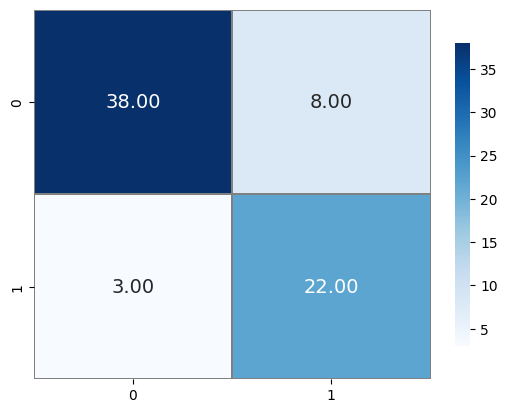

In [76]:
#  dụng phương thức .predict() để đưa ra dự đoán từ tập hợp con X_test:
preds = knn.predict(X_test)

# hiển thị biểu đồ cho kết quả phân loại bài kiểm tra:
matrix = confusion_matrix(y_test, preds, labels=y.unique(), normalize=None)
print(matrix) 

sns.heatmap(matrix, annot=True,#Hiển thị giá trị trong từng ô của biểu đồ.  
                  annot_kws={"size": 14},#Định dạng kích thước chữ cho các giá trị trong biểu đồ.
                  fmt='.2f',#Định dạng số thập phân trong biểu đồ là đến 2 chữ số sau dấu phẩy. 
                  cmap="Blues",#Đặt màu sắc cho biểu đồ là sắc xanh (Blues).
                  cbar_kws={"shrink": .82},#Định dạng kích thước của thanh màu (colorbar) trong biểu đồ.
                  linewidths=0.1, linecolor='gray')#Định dạng độ dày đường viền và màu sắc của đường viền trong biểu đồ.

In [77]:
# hiển thị kết quả phân loại của tập dữ liệu thử nghiệm:
from sklearn.metrics import classification_report

print(classification_report(preds, y_test))

              precision    recall  f1-score   support

         ckd       0.83      0.93      0.87        41
      notckd       0.88      0.73      0.80        30

    accuracy                           0.85        71
   macro avg       0.85      0.83      0.84        71
weighted avg       0.85      0.85      0.84        71



[0.913 0.925 0.906 0.905 0.871 0.887 0.868 0.877 0.879 0.879 0.868 0.879
 0.869 0.879 0.865 0.879 0.865 0.869 0.862 0.869 0.865 0.872 0.858 0.862
 0.848 0.848 0.844 0.841 0.841 0.844 0.837 0.841 0.834 0.837 0.834 0.834
 0.834 0.837 0.837 0.837 0.837 0.844 0.837 0.841 0.83  0.834 0.823 0.827
 0.831]


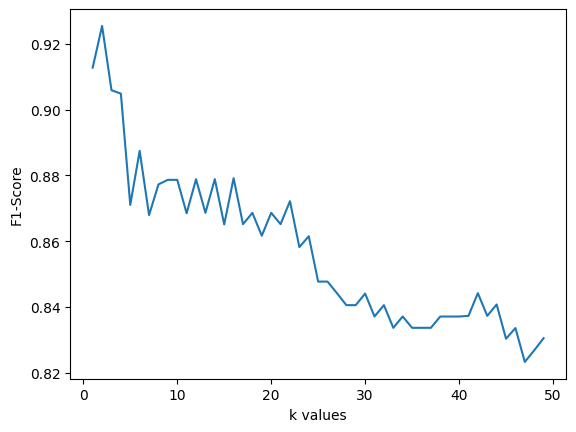

In [78]:
# vẽ các giá trị K so với điểm F1:
from sklearn import metrics
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores=cross_val_score(knn, X_train, y_train,cv=5, scoring='f1_macro')  # or ‘f1_micro’, ‘f1_weighted’
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # hiển thị điểm đến 3 chữ số thập phân
                                                                          
plt.plot(k_range,k_scores)
plt.xlabel('k values')
plt.ylabel('F1-Score')
plt.show()

In [79]:
# hiển thị dự đoán:
preds

array(['ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'notckd', 'notckd', 'notckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'notckd', 'notckd', 'ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'notckd', 'ckd', 'notckd', 'notckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'notckd', 'ckd',
       'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd',
       'ckd', 'notckd'], dtype=object)

Text(0, 0.5, 'Tỷ lệ lỗi')

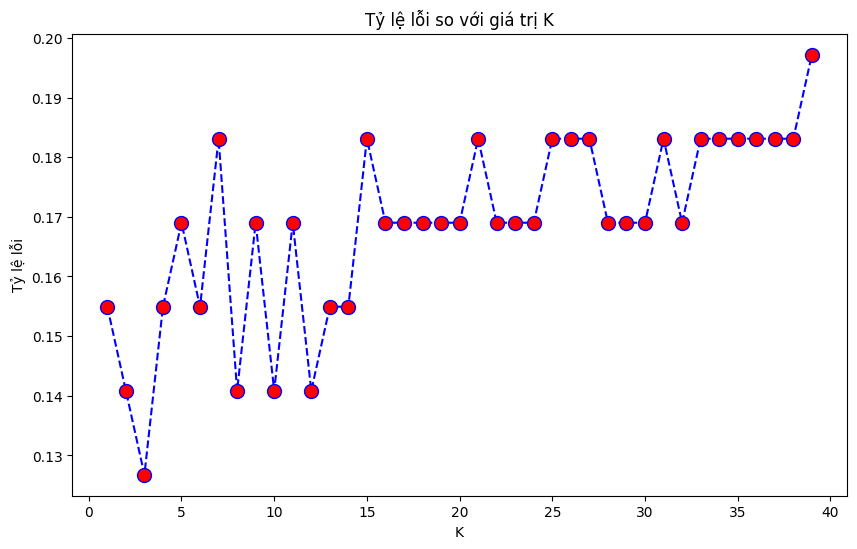

In [80]:
# tìm kiếm giá trị tốt nhất của K:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train , y_train)
    predicts_i = knn.predict(X_test)
    error_rate.append(np.mean(predicts_i != y_test))
    
# hiển thị tỷ lệ lỗi giá trị VS K:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tỷ lệ lỗi so với giá trị K')
plt.xlabel('K')
plt.ylabel('Tỷ lệ lỗi')

In [81]:
# hiển thị độ chính xác của thuật toán KNN:
from sklearn.metrics import accuracy_score

print('Độ chính xác: %3f' % accuracy_score(y_test, preds))

Độ chính xác: 0.845070


#70/30

In [82]:
from sklearn.preprocessing import StandardScaler
# xác định x và y để loại bỏ ba tính năng:
X = df.drop(['classification','Id','Sugar'], axis=1)
y = df['classification']
# xác định các tập huấn luyện và kiểm tra:
# sử dụng tỷ lệ phân chia phù hợp phổ biến nhất (70% đào tạo / 30% kiểm tra)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3)

# này sẽ phù hợp với mô hình KNN:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=1)

[[62  4]
 [ 4 37]]


<AxesSubplot:>

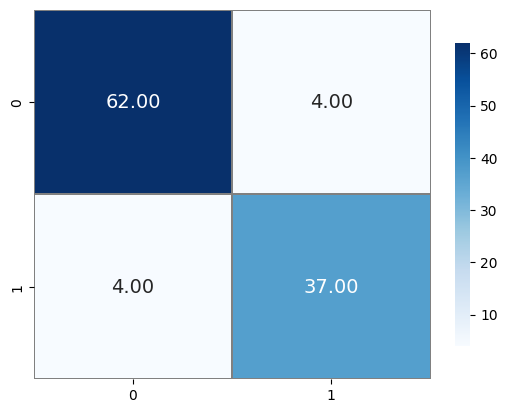

In [83]:
from sklearn.metrics import confusion_matrix
#  dụng phương thức .predict() để đưa ra dự đoán từ tập hợp con X_test:
preds = knn.predict(X_test1)

# hiển thị biểu đồ cho kết quả phân loại bài kiểm tra:
matrix = confusion_matrix(y_test1, preds, labels=y.unique(), normalize=None)
print(matrix) 

sns.heatmap(matrix, annot=True,#Hiển thị giá trị trong từng ô của biểu đồ.  
                  annot_kws={"size": 14},#Định dạng kích thước chữ cho các giá trị trong biểu đồ.
                  fmt='.2f',#Định dạng số thập phân trong biểu đồ là đến 2 chữ số sau dấu phẩy. 
                  cmap="Blues",#Đặt màu sắc cho biểu đồ là sắc xanh (Blues).
                  cbar_kws={"shrink": .82},#Định dạng kích thước của thanh màu (colorbar) trong biểu đồ.
                  linewidths=0.1, linecolor='gray')#Định dạng độ dày đường viền và màu sắc của đường viền trong biểu đồ.


In [84]:
# hiển thị kết quả phân loại của tập dữ liệu thử nghiệm:
from sklearn.metrics import classification_report

print(classification_report(preds, y_test1))

              precision    recall  f1-score   support

         ckd       0.94      0.94      0.94        66
      notckd       0.90      0.90      0.90        41

    accuracy                           0.93       107
   macro avg       0.92      0.92      0.92       107
weighted avg       0.93      0.93      0.93       107



[0.864 0.862 0.87  0.875 0.865 0.871 0.869 0.863 0.833 0.839 0.845 0.852
 0.845 0.852 0.853 0.848 0.849 0.852 0.845 0.849 0.837 0.849 0.841 0.849
 0.845 0.849 0.829 0.837 0.825 0.834 0.83  0.829 0.821 0.829 0.821 0.821
 0.81  0.813 0.806 0.813 0.813 0.817 0.809 0.821 0.818 0.817 0.805 0.813
 0.809]


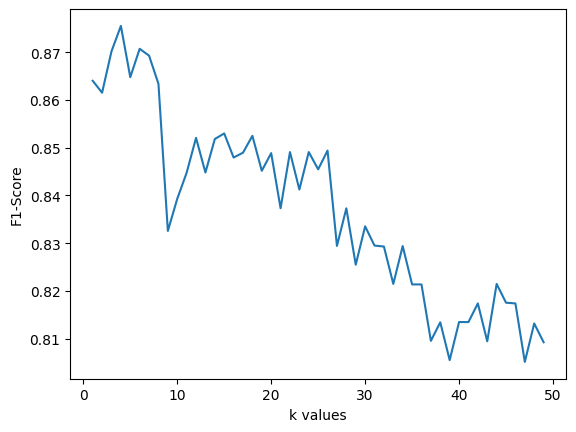

In [85]:
# vẽ các giá trị K so với điểm F1:
from sklearn import metrics
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, y_train1)
    scores=cross_val_score(knn, X_train1, y_train1,cv=5, scoring='f1_macro')  # or ‘f1_micro’, ‘f1_weighted’
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # hiển thị điểm đến 3 chữ số thập phân
                                                                          
plt.plot(k_range,k_scores)
plt.xlabel('k values')
plt.ylabel('F1-Score')
plt.show()

In [86]:
# hiển thị dự đoán:
preds

array(['notckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'notckd', 'notckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd',
       'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd',
       'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'notckd'], dtype=object)

Text(0, 0.5, 'Tỷ lệ lỗi')

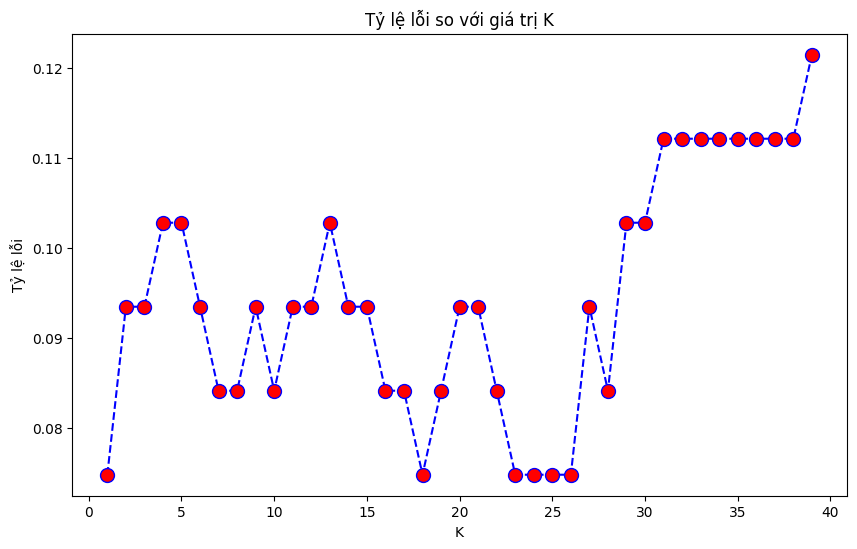

In [87]:
# tìm kiếm giá trị tốt nhất của K:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train1 , y_train1)
    predicts_i = knn.predict(X_test1)
    error_rate.append(np.mean(predicts_i != y_test1))
    
# hiển thị tỷ lệ lỗi giá trị VS K:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tỷ lệ lỗi so với giá trị K')
plt.xlabel('K')
plt.ylabel('Tỷ lệ lỗi')

In [88]:
# hiển thị độ chính xác của thuật toán KNN:
from sklearn.metrics import accuracy_score

print('Độ chính xác: %3f' % accuracy_score(y_test1, preds))

Độ chính xác: 0.925234


#60/40

[[40  4]
 [ 0 27]]


<AxesSubplot:>

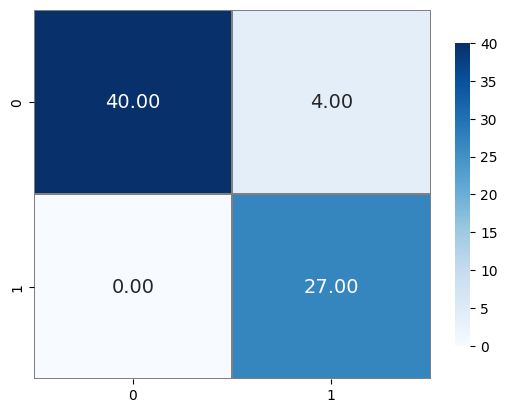

In [89]:
# xác định x và y để loại bỏ ba tính năng:
X = df.drop(['classification','Id','Sugar'], axis=1)
y = df['classification']
# xác định các tập huấn luyện và kiểm tra:
# sử dụng tỷ lệ phân chia phù hợp phổ biến nhất (60% đào tạo / 40% kiểm tra)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

# này sẽ phù hợp với mô hình KNN:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train2, y_train2)
from sklearn.metrics import confusion_matrix
#  dụng phương thức .predict() để đưa ra dự đoán từ tập hợp con X_test:
preds = knn.predict(X_test2)

# hiển thị biểu đồ cho kết quả phân loại bài kiểm tra:
matrix = confusion_matrix(y_test2, preds, labels=y.unique(), normalize=None)
print(matrix) 

sns.heatmap(matrix, annot=True,#Hiển thị giá trị trong từng ô của biểu đồ.  
                  annot_kws={"size": 14},#Định dạng kích thước chữ cho các giá trị trong biểu đồ.
                  fmt='.2f',#Định dạng số thập phân trong biểu đồ là đến 2 chữ số sau dấu phẩy. 
                  cmap="Blues",#Đặt màu sắc cho biểu đồ là sắc xanh (Blues).
                  cbar_kws={"shrink": .82},#Định dạng kích thước của thanh màu (colorbar) trong biểu đồ.
                  linewidths=0.1, linecolor='gray')#Định dạng độ dày đường viền và màu sắc của đường viền trong biểu đồ.

In [90]:
# hiển thị kết quả phân loại của tập dữ liệu thử nghiệm:
from sklearn.metrics import classification_report

print(classification_report(preds, y_test2))

              precision    recall  f1-score   support

         ckd       0.91      1.00      0.95        40
      notckd       1.00      0.87      0.93        31

    accuracy                           0.94        71
   macro avg       0.95      0.94      0.94        71
weighted avg       0.95      0.94      0.94        71



[0.865 0.859 0.861 0.878 0.867 0.866 0.857 0.863 0.853 0.853 0.861 0.868
 0.858 0.861 0.858 0.864 0.854 0.865 0.854 0.861 0.847 0.858 0.837 0.844
 0.827 0.823 0.834 0.848 0.83  0.841 0.827 0.837 0.83  0.834 0.83  0.844
 0.834 0.837 0.83  0.83  0.82  0.82  0.82  0.823 0.823 0.82  0.816 0.813
 0.813]


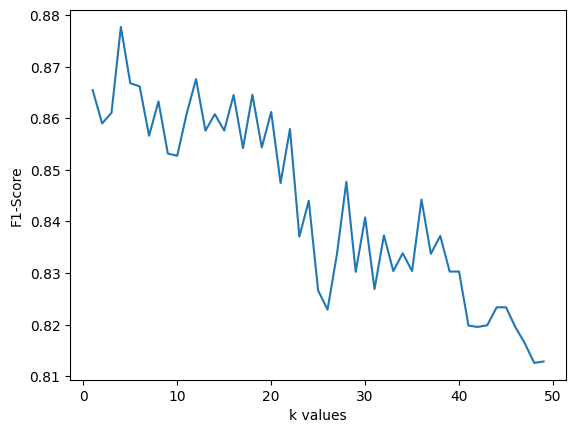

Text(0, 0.5, 'Tỷ lệ lỗi')

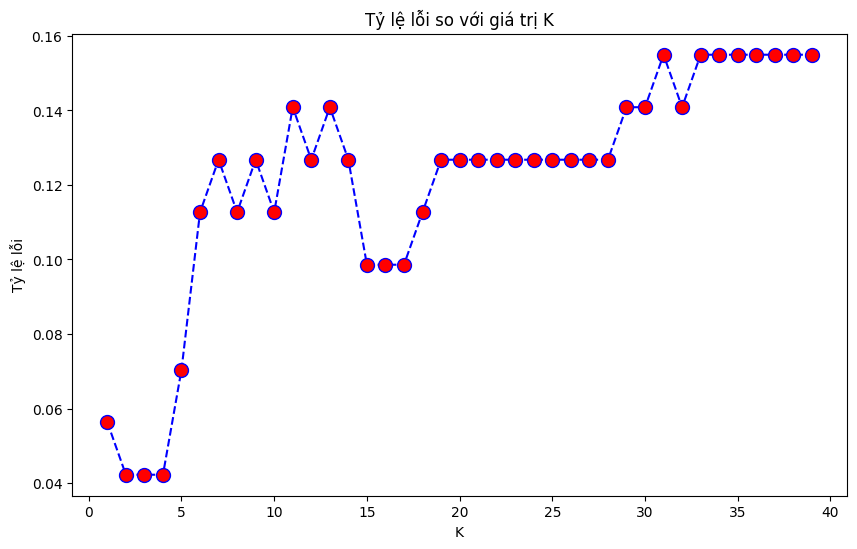

In [91]:
# vẽ các giá trị K so với điểm F1:
from sklearn import metrics
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2, y_train2)
    scores=cross_val_score(knn, X_train2, y_train2,cv=5, scoring='f1_macro')  # or ‘f1_micro’, ‘f1_weighted’
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # hiển thị điểm đến 3 chữ số thập phân
                                                                          
plt.plot(k_range,k_scores)
plt.xlabel('k values')
plt.ylabel('F1-Score')
plt.show()

# hiển thị dự đoán:
preds

# tìm kiếm giá trị tốt nhất của K:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train2 , y_train2)
    predicts_i = knn.predict(X_test2)
    error_rate.append(np.mean(predicts_i != y_test2))
    
# hiển thị tỷ lệ lỗi giá trị VS K:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tỷ lệ lỗi so với giá trị K')
plt.xlabel('K')
plt.ylabel('Tỷ lệ lỗi')

In [92]:
# hiển thị độ chính xác của thuật toán KNN:
from sklearn.metrics import accuracy_score

print('Độ chính xác: %3f' % accuracy_score(y_test2, preds))

Độ chính xác: 0.943662


#50/50

[[43  7]
 [ 2 19]]


<AxesSubplot:>

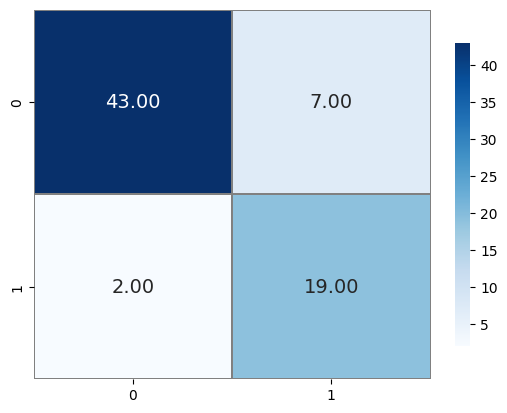

In [93]:
# xác định x và y để loại bỏ ba tính năng:
X = df.drop(['classification','Id','Sugar'], axis=1)
y = df['classification']
# xác định các tập huấn luyện và kiểm tra:
# sử dụng tỷ lệ phân chia phù hợp phổ biến nhất (50% đào tạo / 50% kiểm tra)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2)

# này sẽ phù hợp với mô hình KNN:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train3, y_train3)
from sklearn.metrics import confusion_matrix
#  dụng phương thức .predict() để đưa ra dự đoán từ tập hợp con X_test:
preds = knn.predict(X_test3)

# hiển thị biểu đồ cho kết quả phân loại bài kiểm tra:
matrix = confusion_matrix(y_test3, preds, labels=y.unique(), normalize=None)
print(matrix) 

sns.heatmap(matrix, annot=True,#Hiển thị giá trị trong từng ô của biểu đồ.  
                  annot_kws={"size": 14},#Định dạng kích thước chữ cho các giá trị trong biểu đồ.
                  fmt='.2f',#Định dạng số thập phân trong biểu đồ là đến 2 chữ số sau dấu phẩy. 
                  cmap="Blues",#Đặt màu sắc cho biểu đồ là sắc xanh (Blues).
                  cbar_kws={"shrink": .82},#Định dạng kích thước của thanh màu (colorbar) trong biểu đồ.
                  linewidths=0.1, linecolor='gray')#Định dạng độ dày đường viền và màu sắc của đường viền trong biểu đồ.

In [94]:
# hiển thị kết quả phân loại của tập dữ liệu thử nghiệm:
from sklearn.metrics import classification_report

print(classification_report(preds, y_test3))

              precision    recall  f1-score   support

         ckd       0.86      0.96      0.91        45
      notckd       0.90      0.73      0.81        26

    accuracy                           0.87        71
   macro avg       0.88      0.84      0.86        71
weighted avg       0.88      0.87      0.87        71



[0.891 0.892 0.91  0.892 0.896 0.883 0.875 0.885 0.872 0.868 0.855 0.868
 0.862 0.855 0.862 0.865 0.862 0.869 0.855 0.859 0.851 0.862 0.855 0.865
 0.855 0.858 0.855 0.851 0.855 0.855 0.855 0.862 0.862 0.862 0.859 0.859
 0.855 0.859 0.855 0.859 0.848 0.851 0.852 0.852 0.852 0.852 0.845 0.848
 0.845]


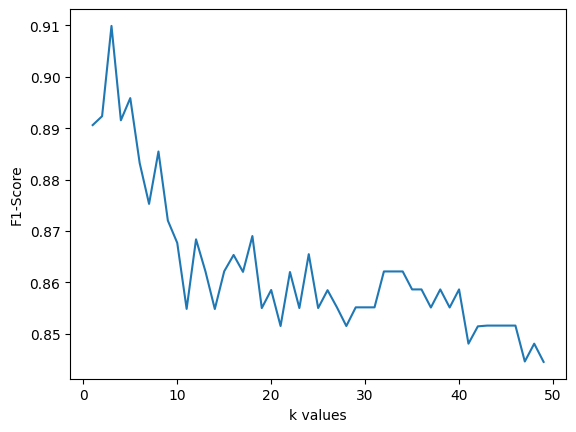

Text(0, 0.5, 'Tỷ lệ lỗi')

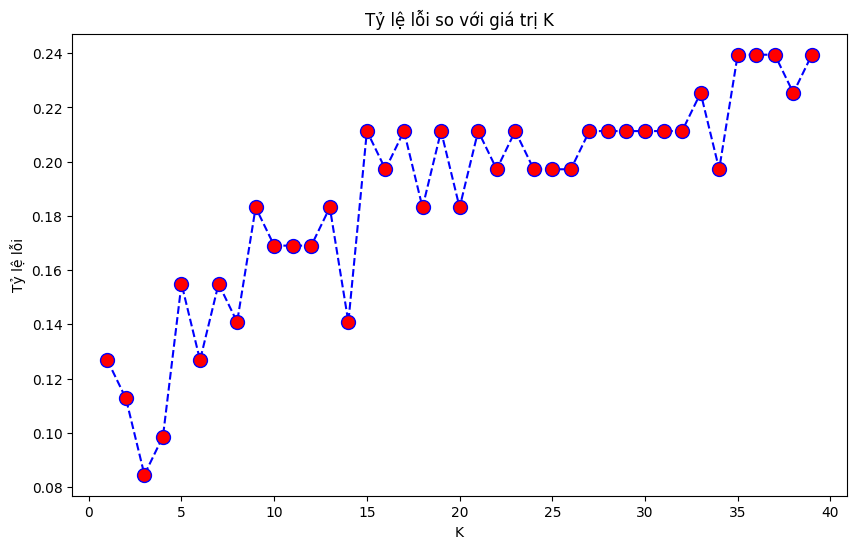

In [95]:
# vẽ các giá trị K so với điểm F1:
from sklearn import metrics
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train3, y_train3)
    scores=cross_val_score(knn, X_train3, y_train3,cv=5, scoring='f1_macro')  # or ‘f1_micro’, ‘f1_weighted’
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # hiển thị điểm đến 3 chữ số thập phân
                                                                          
plt.plot(k_range,k_scores)
plt.xlabel('k values')
plt.ylabel('F1-Score')
plt.show()

# hiển thị dự đoán:
preds

# tìm kiếm giá trị tốt nhất của K:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train3 , y_train3)
    predicts_i = knn.predict(X_test3)
    error_rate.append(np.mean(predicts_i != y_test3))
    
# hiển thị tỷ lệ lỗi giá trị VS K:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tỷ lệ lỗi so với giá trị K')
plt.xlabel('K')
plt.ylabel('Tỷ lệ lỗi')

In [96]:
# hiển thị độ chính xác của thuật toán KNN:
from sklearn.metrics import accuracy_score

print('Độ chính xác: %3f' % accuracy_score(y_test3, preds))

Độ chính xác: 0.873239


# ĐÁNH GIÁ

In [97]:
X1 = df.drop(['classification','Id','Sugar'], axis=1)
df.classification=df.classification.map({ 'ckd' : 1, 'notckd' : 0})
y1 = df['classification']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

y1

131    1
190    1
1      1
150    1
186    1
      ..
194    1
160    1
39     1
171    1
200    1
Name: classification, Length: 355, dtype: int64

In [98]:
# hiển thị kích thước của tập huấn luyện x:
X1_train['Albumin'].ndim
# hiển thị hình dạng của tập huấn luyện x:
X1_train['Albumin'].shape
# hiển thị kích thước của tập huấn luyện y:
y1_train.ndim
# hiển thị hình dạng của tập huấn luyện y:
y1_train.shape


(284,)

In [99]:
# định hình lại tập huấn luyện
from sklearn import linear_model


regr1 = linear_model.LinearRegression()
train_x1 =X1_train['Albumin'].values.reshape(-1, 1)
train_y1 = y1_train.values.reshape(-1, 1)
regr1.fit (train_x1, train_y1)

# hiển thị hệ số và hệ số chặn:
print ('hệ số: ', regr1.coef_)
print ('đánh chặn: ',regr1.intercept_)

hệ số:  [[0.23804183]]
đánh chặn:  [0.37173574]


Text(0, 0.5, 'Sugar')

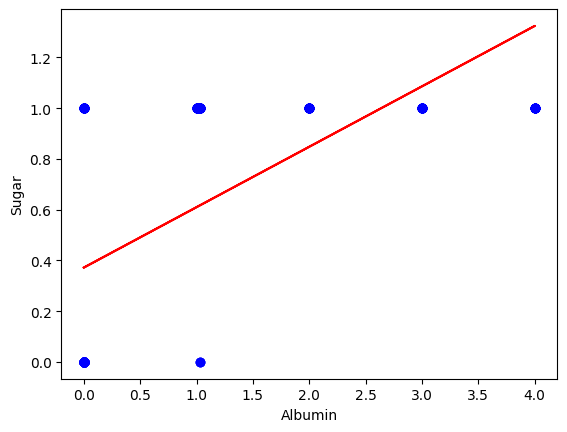

In [100]:
# hiển thị biểu đồ giữa dữ liệu Albumin và dữ liệu Đường:
plt.scatter(train_x1, train_y1,  color='blue')
plt.plot(train_x1, regr1.coef_[0][0]*train_x1 + regr1.intercept_[0], '-r')
plt.xlabel("Albumin")
plt.ylabel("Sugar")

In [101]:
#lấy hệ số tương ứng với đặc trưng đầu tiên
regr1.coef_[0][0]

0.23804183293914566

In [102]:
# hiển thị lỗi tuyệt đối trung bình, lỗi bình phương trung bình và bình phương trung bình gốc:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
import math
from sklearn.metrics import r2_score


test_x1 =X1_test['Albumin'].values.reshape(-1, 1)
test_y1= y1_test.values.reshape(-1, 1)
test_y_hat = regr1.predict(test_x1)


MAE = mean_absolute_error(test_y1, test_y_hat)
print("sai số tuyệt đối: %.2f" % MAE)

MSE =mean_squared_error(test_y1, test_y_hat)
print("lỗi bình phương:%.2f" %MSE)

RMSE = math.sqrt(MSE)
print("Gốc lỗi bình phương:%.2f" %RMSE)

print("hệ số xác định: %.2f" % r2_score(test_y1, test_y_hat) )

sai số tuyệt đối: 0.34
lỗi bình phương:0.14
Gốc lỗi bình phương:0.38
hệ số xác định: 0.36


Text(0, 0.5, 'Hemoglobin')

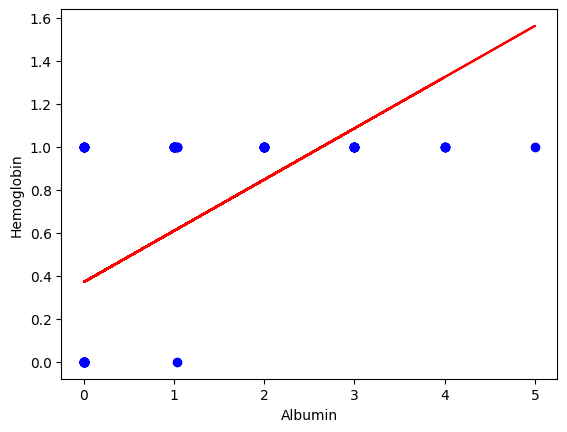

In [103]:
# hiển thị biểu đồ giữa dữ liệu Albumin và dữ liệu Hemoglobin:
plt.scatter(test_x1, test_y1,  color='blue')
plt.plot(test_x1, regr1.coef_[0][0]*test_x1+ regr1.intercept_[0], '-r')
plt.xlabel("Albumin")
plt.ylabel("Hemoglobin")

[0.913 0.925 0.906 0.905 0.871 0.887 0.868 0.877 0.879 0.879 0.868 0.879
 0.869 0.879 0.865 0.879 0.865 0.869 0.862 0.869 0.865 0.872 0.858 0.862
 0.848 0.848 0.844 0.841 0.841 0.844 0.837 0.841 0.834 0.837 0.834 0.834
 0.834 0.837 0.837 0.837 0.837 0.844 0.837 0.841 0.83  0.834 0.823 0.827
 0.831]


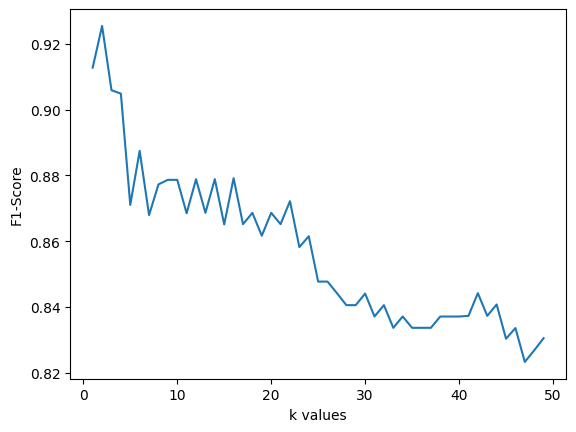

In [104]:
# hiển thị biểu đồ giữa giá trị K và Điểm F1:
from sklearn import metrics
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores=cross_val_score(knn, X_train, y_train,cv=5, scoring='f1_macro')  # or ‘f1_micro’, ‘f1_weighted’
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # hiển thị điểm đến 3 chữ số thập phân
                                                                          
plt.plot(k_range,k_scores)
plt.xlabel('k values')
plt.ylabel('F1-Score')
plt.show()

In [105]:
# hiển thị giá trị K tối ưu:
optimal_k = k_range[k_scores.index(max(k_scores))]
print("Optimal K: ", optimal_k)

Optimal K:  2


[[39  7]
 [ 4 21]]


<AxesSubplot:>

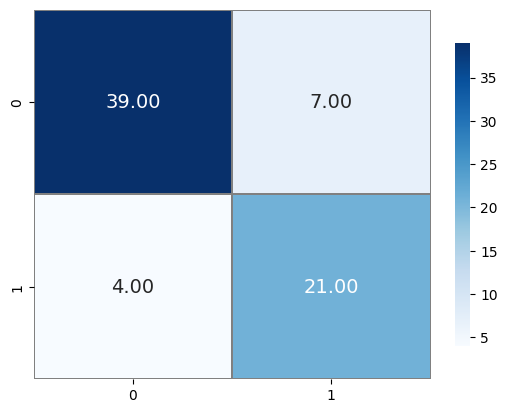

In [106]:
#80/20
# triển khai giá trị K tối ưu mới cho dữ liệu thử nghiệm và thực hiện các bước tương tự như các bước
# đã làm trong thử nghiệm:
knn_optimal = KNeighborsClassifier(n_neighbors=6) 
knn_optimal.fit(X_train, y_train)
preds = knn_optimal.predict(X_test)

matrix = confusion_matrix(y_test, preds, labels=y.unique(), normalize=None)
print(matrix)

sns.heatmap(matrix, annot=True,  #Hiển thị giá trị trong từng ô của biểu đồ.
                  annot_kws={"size": 14},
                  fmt='.2f', cmap="Blues",#Định dạng số thập phân trong biểu đồ là đến 2 chữ số sau dấu phẩy.
                   cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

[[60  6]
 [ 4 37]]


<AxesSubplot:>

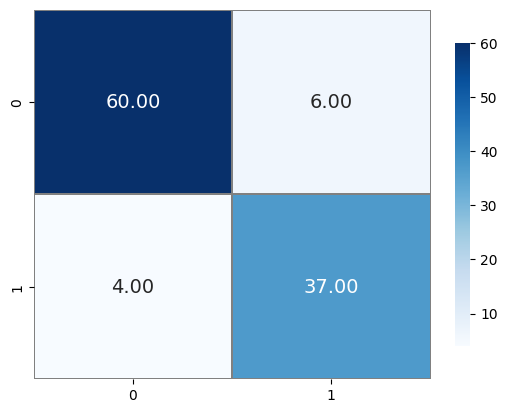

In [107]:
# triển khai giá trị K tối ưu mới cho dữ liệu thử nghiệm và thực hiện các bước tương tự như các bước
# đã làm trong thử nghiệm:
knn_optimal = KNeighborsClassifier(n_neighbors=6) 
knn_optimal.fit(X_train1, y_train1)
preds = knn_optimal.predict(X_test1)

matrix = confusion_matrix(y_test1, preds, labels=y.unique(), normalize=None)
print(matrix)

sns.heatmap(matrix, annot=True,  #Hiển thị giá trị trong từng ô của biểu đồ.
                  annot_kws={"size": 14},
                  fmt='.2f', cmap="Blues",#Định dạng số thập phân trong biểu đồ là đến 2 chữ số sau dấu phẩy.
                   cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

[[40  4]
 [ 4 23]]


<AxesSubplot:>

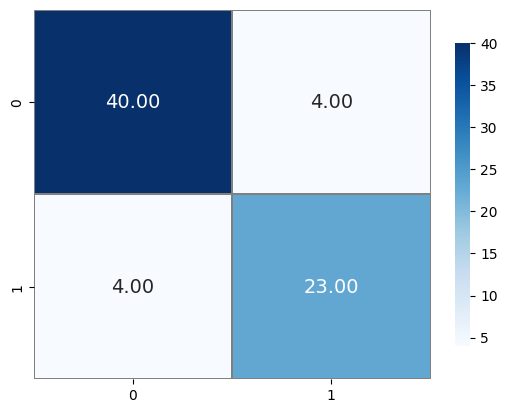

In [108]:
# triển khai giá trị K tối ưu mới cho dữ liệu thử nghiệm và thực hiện các bước tương tự như các bước
# đã làm trong thử nghiệm:
knn_optimal = KNeighborsClassifier(n_neighbors=6) 
knn_optimal.fit(X_train2, y_train2)
preds = knn_optimal.predict(X_test2)

matrix = confusion_matrix(y_test2, preds, labels=y.unique(), normalize=None)
print(matrix)

sns.heatmap(matrix, annot=True,  #Hiển thị giá trị trong từng ô của biểu đồ.
                  annot_kws={"size": 14},
                  fmt='.2f', cmap="Blues",#Định dạng số thập phân trong biểu đồ là đến 2 chữ số sau dấu phẩy.
                   cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

[[41  9]
 [ 0 21]]


<AxesSubplot:>

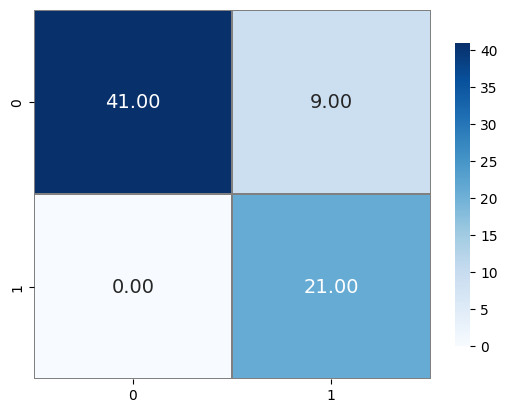

In [109]:
# triển khai giá trị K tối ưu mới cho dữ liệu thử nghiệm và thực hiện các bước tương tự như các bước
# đã làm trong thử nghiệm:
knn_optimal = KNeighborsClassifier(n_neighbors=6) 
knn_optimal.fit(X_train3, y_train3)
preds = knn_optimal.predict(X_test3)

matrix = confusion_matrix(y_test3, preds, labels=y.unique(), normalize=None)
print(matrix)

sns.heatmap(matrix, annot=True,  #Hiển thị giá trị trong từng ô của biểu đồ.
                  annot_kws={"size": 14},
                  fmt='.2f', cmap="Blues",#Định dạng số thập phân trong biểu đồ là đến 2 chữ số sau dấu phẩy.
                   cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

In [110]:
from joblib import dump

# Lưu model vào file
filename = "KNN_real.joblib"
dump(knn, filename)


['KNN_real.joblib']

#RANDOM FORES

In [111]:
modelRF = RandomForestClassifier()

In [112]:
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [113]:
y_predrf = modelRF.predict(X_test)

In [114]:
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

         ckd       1.00      0.98      0.99        46
      notckd       0.96      1.00      0.98        25

    accuracy                           0.99        71
   macro avg       0.98      0.99      0.98        71
weighted avg       0.99      0.99      0.99        71



<AxesSubplot:>

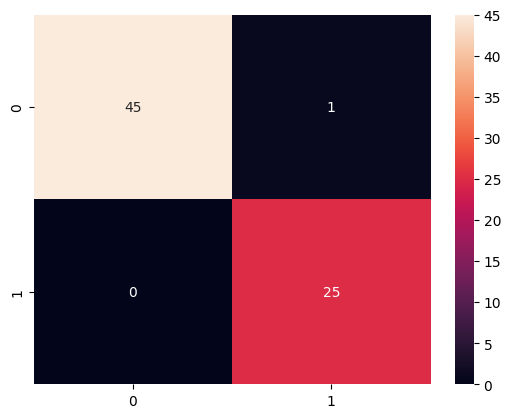

In [115]:
ConM=confusion_matrix(y_test, y_predrf)
sns.heatmap(ConM,annot=True)

In [116]:
print('độ chính xác: %3f' % accuracy_score(y_test, y_predrf))

độ chính xác: 0.985915


In [117]:
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump

# Tạo mô hình RF(Random Forest)
modelRF = RandomForestClassifier()

# Huấn luyện mô hình với dữ liệu huấn luyện X_train, y_train

# Lưu model vào file
filename = "RANDOM_FORES.joblib"
dump(modelRF, filename)


['RANDOM_FORES.joblib']